In [2]:
legend_utils_path = '/global/homes/f/fnafis/LEGEND/legend'
import sys
if legend_utils_path not in sys.path:
    sys.path.append(legend_utils_path)

In [3]:
import uproot as ur
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit
import pygama.math.histogram as pgh
import legend_utils as lu
from matplotlib.ticker import AutoMinorLocator
from matplotlib.ticker import FormatStrFormatter
plt.style.use('~/KrSTC/data/physrev.mpl')

In [4]:
def gauss(x, A, mu, sigma):
        return A* np.exp(-(x-mu)**2 / (2*sigma**2))
def quad_bkg(x, p0, p1, p2):
    return p0 + p1*x + p2*x**2
def gauss_with_quad_bkg(x,  A, mu, sigma, p0, p1, p2):  # bkg = p0 + p1*x + p2*x**2
    return gauss(x, A, mu, sigma) + quad_bkg(x, p0, p1, p2)

def fwhm_func(E_cal, a, b, c):
     return np.sqrt(a**2 + b**2*E_cal**2 + c**4*E_cal**4)

In [35]:
evt_filenames_list = '/global/homes/f/fnafis/LEGEND/legend/sims/evt_filenames_3.txt'
multiplicity = 1
df = pd.DataFrame()
primaries = 0
with open(evt_filenames_list) as f:
    evt_filenames = f.read().splitlines()
    for evt_filename in evt_filenames:
        ff = ur.open(evt_filename)
        dets = ff['simTree/mage_id'].array(library='np')
        primaries += len(dets)
        energies = ff['simTree/energy'].array(library='np')
        d = pd.DataFrame({'mage_id': dets, 'energy': energies})
        mul_1 = d['mage_id'].apply(lambda x: len(x)==1)
        d = d[mul_1]
        d['mage_id'] = d['mage_id'].apply(lambda x: x[0])
        d['energy'] = d['energy'].apply(lambda x: x[0])
        df = pd.concat([df, d], ignore_index=True)
    
print(primaries)
df['energy'] = df['energy'].apply(lambda x: x*1000)
df


5000


,mage_id,energy
0,1010701,161.420099
1,1010703,403.129379
2,1010704,506.025188
3,1010503,3201.456249
4,1010704,570.790307
...,...,...
2023,1010704,220.727269
2024,1010101,64.370189
2025,1010705,180.435442
2026,1010502,225.205888


In [44]:
evt_filenames_list = '/global/homes/f/fnafis/LEGEND/legend/sims/evt_filenames_3.txt'
df = pd.DataFrame()
primaries = 0
with open(evt_filenames_list) as f:
    evt_filenames = f.read().splitlines()
    for evt_filename in evt_filenames:
        ff = ur.open(evt_filename)
        print(evt_filename, 'opened')
        dets = ff['simTree/mage_id'].array(library='np')
        dets = np.concatenate(dets)
        primaries += len(dets)
        energies = ff['simTree/energy'].array(library='np')
        energies = np.concatenate(energies)
        d = pd.DataFrame({'mage_id': dets, 'energy': energies})
        df = pd.concat([df, d], ignore_index=True)
   
print(primaries)
df['energy'] = df['energy'].apply(lambda x: x*1000)
df

/global/homes/f/fnafis/56Co_SIS2_neg376mm_test_with_one_gamma_2_evt.root opened
238691


,mage_id,energy
0,1010207,171.655067
1,1010208,2715.253099
2,1010207,2668.628302
3,1010106,500.485400
4,1010908,393.994396
...,...,...
238686,1010912,1761.342257
238687,1010810,196.755944
238688,1010809,192.603869
238689,1011013,2546.698963


Text(0.5, 1.0, 'simulation with one 3009 keV gamma')

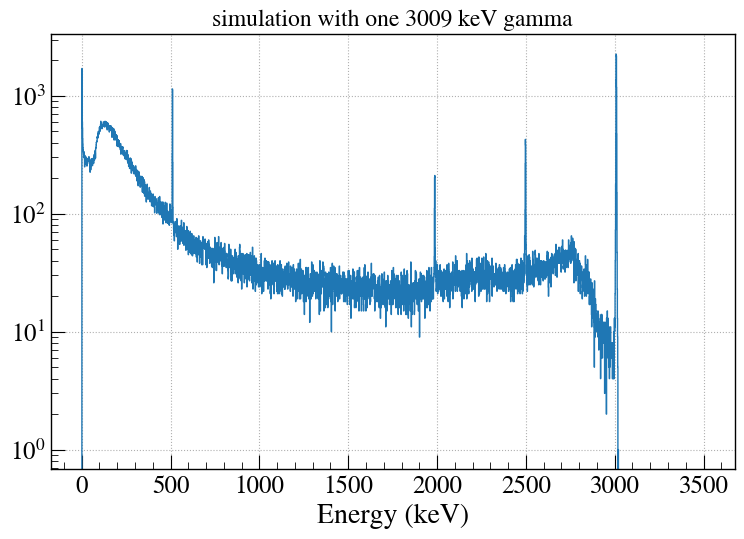

In [48]:
h,b,v = pgh.get_hist(df['energy'], range=(0, 3500), dx=1)
pgh.plot_hist(h,b, lw=1)
plt.yscale('log')
plt.xlabel('Energy (keV)')
plt.title('simulation with one 3009 keV gamma')

In [12]:
dep_peaks = [
    {
        'name': '1576',
        'energy': 1576.75,
        'intensity': 16.67,
        'range': [1572,1582],
        'curve_fit_guess': [200, 1576.5, 2, 0, 0, 0],
        'sidebands': [[1572,1573],[1580,1582]],
        'sideband_peak_range': [1573, 1580]
    },
    {
        'name':'1635',
        'energy': 1634.4,
        'intensity': 0.019,
        'range': [1630,1640],
        'curve_fit_guess': [150, 1634.5, 1, 0, 0, 0],
        'curve_fit_guess_mu_fixed': [150, 1, 0, 0, 0],
        'sidebands': [[1630,1632],[1638,1640]],
        'sideband_peak_range': [1632, 1638]
    },
    {
        'name': '1987',
        'energy': 1987.6,
        'intensity': 1.09,
        'range': [1975,2000],
        'curve_fit_guess': [1000, 1988, 1, 0, 0, 0],
        'cuve_fit_guess_mu_fixed': [1000, 1, 0, 0, 0],
        'sidebands': [[1980,1982],[1992,1995]],
        'sideband_peak_range': [1982, 1992]
    },
    {
        'name': '2180',
        'energy': 2180.25,
        'intensity': 3.19,
        'range': [2174,2187],
        'curve_fit_guess': [400, 2180, 1, 0, 0, 0],
        'sidebands': [[2174,2176],[2185,2187]],
        'sideband_peak_range': [2176, 2185]
    },
    {
        'name': '2231',
        'energy': 2231.5,
        'intensity': 7.92,
        'range': [2220,2240],
        'curve_fit_guess': [300, 2231, 1, 0, 0, 0],
        'sidebands': [[2220,2226],[2238,2240]],
        'sideband_peak_range': [2226, 2238]
    },
    {
        'name': '2251',
        'energy': 2251,
        'intensity': 1.86,
        'range': [2245,2257],
        'curve_fit_guess': [300, 2252, 2, 0, 0, 0],
        'sidebands': [[2245,2247],[2254,2256]],
        'sideband_peak_range': [2247, 2254]
    },
    {
        'name': '2429',
        'energy': 2429.5,
        'intensity': 0.95,
        'range': [2422,2438],
        'curve_fit_guess': [700, 2429, 1, 0, 0, 0],
        'cuve_fit_guess_mu_fixed': [700, 1, 0, 0, 0],
        'sidebands': [[2422,2425],[2435,2438]],
        'sideband_peak_range': [2426, 2433]
    }
]

# peaks_in full spectrum
all_peaks = [
    {
        'name':'846',
        'energy': 846.8,
        'intensity': 100,
        'range': [835, 855],
        'curve_fit_guess': [1000, 846.8, 1, 0, 0, 0],
        'sidebands': [[835, 840],[852, 855]],
        'sideband_peak_range': [843, 850.5]
    },
    {
        'name': '1037',
        'energy': 1037,
        'intensity': 14.3,
        'range': [1025, 1045],
        'curve_fit_guess': [1000, 1037, 1, 0, 0, 0],
        'sidebands': [[1025, 1030],[1043, 1045]],
        'sideband_peak_range': [1034, 1042]
    },
    {
        'name': '1238',
        'energy': 1238,
        'intensity': 66.5,
        'range': [1228, 1248],
        'curve_fit_guess': [1000, 1238, 1, 0, 0, 0],
        'sidebands': [[1228, 1232],[1244, 1247]],
        'sideband_peak_range': [1234, 1242.5]
    },
    {
        'name': '1771',
        'energy': 1771,
        'intensity': 15.4,
        'range': [1760, 1780],
        'curve_fit_guess': [1000, 1771, 1, 0, 0, 0],
        'sidebands': [[1760, 1765],[1777, 1780]],
        'sideband_peak_range': [1766.5, 1776]
    },
    {
        'name': '2015',
        'energy': 2015,
        'intensity': 3.015,
        'range': [2005, 2025],
        'curve_fit_guess': [1000, 2015, 1, 0, 0, 0],
        'sidebands': [[2005, 2008],[2022, 2025]],
        'sideband_peak_range': [2010, 2020]
    },
    {
        'name': '2034',
        'energy': 2034,
        'intensity': 7.77,
        'range': [2025, 2045],
        'curve_fit_guess': [1000, 2034, 1, 0, 0, 0],
        'sidebands': [[2025, 2028],[2041, 2045]],
        'sideband_peak_range': [2030, 2040]
    },
    {
        'name': '2113',
        'energy': 2113,
        'intensity': 0.377,
        'range': [2106, 2120],
        'curve_fit_guess': [1000, 2113, 1, 0, 0, 0],
        'sidebands': [[2106, 2108],[2119, 2120]],
        'sideband_peak_range': [2108.5, 2118]
    },
    {
        'name': '2598',
        'energy': 2598,
        'intensity': 16.67,
        'range': [2588, 2608],
        'curve_fit_guess': [1000, 2598, 1, 0, 0, 0],
        'sidebands': [[2588, 2592],[2605, 2607]],
        'sideband_peak_range': [2593, 2604]
    },
    {
        'name': '2657',
        'energy': 2657,
        'intensity': 0.019,
        'range': [2650, 2665],
        'curve_fit_guess': [1000, 2657, 1, 0, 0, 0],
        'sidebands': [[2650, 2654],[2661, 2665]],
        'sideband_peak_range': [2655.5, 2660.5]
    },
    {
        'name': '3009',
        'energy': 3009,
        'intensity': 1.04,
        'range': [3000, 3020],
        'curve_fit_guess': [1000, 3009, 1, 0, 0, 0],
        'sidebands': [[3000, 3002],[3017, 3020]],
        'sideband_peak_range': [3004, 3015.5]
    },
    {
        'name': '3202',
        'energy': 3202,
        'intensity': 3.21,
        'range': [3190, 3210],
        'curve_fit_guess': [1000, 3202, 1, 0, 0, 0],
        'sidebands': [[3190, 3193],[3209, 3210]],
        'sideband_peak_range': [3196, 3208]
    },
    {
        'name': '3253',
        'energy': 3253,
        'intensity': 7.92,
        'range': [3240, 3261],
        'curve_fit_guess': [1000, 3253, 1, 0, 0, 0],
        'sidebands': [[3240, 3243],[3260, 3261]],
        'sideband_peak_range': [3247.5, 3260]
    },
    {
        'name': '3273',
        'energy': 3273,
        'intensity': 1.88,
        'range': [3260, 3282],
        'curve_fit_guess': [1000, 3273, 1, 0, 0, 0],
        'sidebands': [[3260, 3265],[3280, 3282]],
        'sideband_peak_range': [3264, 3276]
    },
    {
        'name': '3451',
        'energy': 3451,
        'intensity': 0.95,
        'range': [3440, 3460],
        'curve_fit_guess': [1000, 3451, 1, 0, 0, 0],
        'sidebands': [[3457.5, 3460],[3257.5, 3460]],
        'sideband_peak_range': [3448.5, 3454.5]
    }
]

In [33]:
hm = lu.get_heights_map()
lu.convert_height_map_to_mage_ref_frame(hm)

,string 1,string 2,string 3,string 4,string 5,string 7,string 8,string 9,string 10,string 11
1,357.4,396.48,390.64,393.34,379.5,332.4,398.05,395.25,390.52,396.39
2,298.1,312.48,360.85,359.70,283.8,236.9,375.16,366.91,357.93,367.73
3,211.1,228.48,321.35,326.13,172.0,136.5,275.16,335.73,324.78,342.83
4,135.9,135.48,287.05,299.68,96.4,36.0,194.66,303.85,292.66,293.53
5,63.9,30.48,239.25,266.50,20.8,-49.5,114.26,251.15,257.32,240.73
6,-1.3,-76.52,189.25,237.46,NaN,-144.6,28.86,201.25,225.22,189.53
7,-81.4,-158.82,148.85,207.24,NaN,-202.0,-38.14,153.65,195.01,148.33
8,-151.7,-239.32,114.55,143.94,NaN,NaN,-103.34,111.55,170.16,114.13
9,-217.8,-314.62,75.15,76.34,NaN,NaN,-186.54,63.15,89.76,74.33
10,NaN,NaN,NaN,8.84,NaN,NaN,-251.54,18.85,4.16,34.53


In [34]:
lu.convert_height_map_to_sis_ref_frame(hm)

,string 1,string 2,string 3,string 4,string 5,string 7,string 8,string 9,string 10,string 11
1,8046.4,8007.32,8013.16,8010.46,8024.3,8071.4,8005.75,8008.55,8013.28,8007.41
2,8105.7,8091.32,8042.95,8044.10,8120.0,8166.9,8028.64,8036.89,8045.87,8036.07
3,8192.7,8175.32,8082.45,8077.67,8231.8,8267.3,8128.64,8068.07,8079.02,8060.97
4,8267.9,8268.32,8116.75,8104.12,8307.4,8367.8,8209.14,8099.95,8111.14,8110.27
5,8339.9,8373.32,8164.55,8137.30,8383.0,8453.3,8289.54,8152.65,8146.48,8163.07
6,8405.1,8480.32,8214.55,8166.34,NaN,8548.4,8374.94,8202.55,8178.58,8214.27
7,8485.2,8562.62,8254.95,8196.56,NaN,8605.8,8441.94,8250.15,8208.79,8255.47
8,8555.5,8643.12,8289.25,8259.86,NaN,NaN,8507.14,8292.25,8233.64,8289.67
9,8621.6,8718.42,8328.65,8327.46,NaN,NaN,8590.34,8340.65,8314.04,8329.47
10,NaN,NaN,NaN,8394.96,NaN,NaN,8655.34,8384.95,8399.64,8369.27


In [37]:
count_map = lu.get_count_map(df)
count_map_percentage = count_map/count_map.sum().sum()*100
count_map_percentage = count_map_percentage.round(1)
count_map_percentage_with_det_type = lu.attach_det_type_map(count_map_percentage)
count_map_percentage_with_det_type = count_map_percentage_with_det_type.apply(lambda x: x+'%')
# strip % if starts with '.'
for col in count_map_percentage_with_det_type:
    for i in range(1, len(count_map_percentage_with_det_type[col])+1):
        val = count_map_percentage_with_det_type[col][i]
        if val[0] == '.':
            count_map_percentage_with_det_type[col][i] = '.'
count_map_percentage_with_det_type

,string 1,string 2,string 3,string 4,string 5,string 7,string 8,string 9,string 10,string 11
1,V:0.1%,B:0.0%,B:0.0%,B:0.0%,V:0.1%,V:0.2%,B:0.1%,B:0.1%,B:0.0%,B:0.0%
2,V:0.2%,C:0.1%,B:0.0%,B:0.1%,V:0.5%,V:1.1%,B:0.1%,B:0.0%,B:0.1%,B:0.0%
3,V:0.3%,C:0.2%,P:0.1%,B:0.0%,V:1.9%,V:4.8%,C:0.9%,B:0.2%,B:0.1%,B:0.1%
4,V:0.3%,C:0.4%,P:0.1%,B:0.1%,V:2.6%,V:29.4%,V:3.0%,B:0.3%,B:0.3%,P:0.2%
5,V:0.4%,C:0.4%,P:0.2%,B:0.2%,V:2.4%,V:7.5%,V:9.6%,P:0.8%,B:0.3%,P:0.4%
6,V:0.4%,C:0.3%,P:0.1%,B:0.4%,.,V:1.2%,V:8.6%,P:1.5%,B:0.6%,P:0.6%
7,V:0.2%,V:0.1%,P:0.2%,B:0.3%,.,V:0.2%,V:1.6%,P:2.0%,B:0.7%,P:0.4%
8,V:0.1%,V:0.1%,P:0.2%,V:0.4%,.,.,V:0.7%,P:1.4%,B:0.5%,P:0.3%
9,V:0.1%,V:0.1%,P:0.1%,V:0.3%,.,.,V:0.2%,P:0.7%,V:1.3%,P:0.2%
10,.,.,.,V:0.2%,.,.,V:0.1%,P:0.3%,V:1.0%,P:0.2%


In [14]:
count_map_K = count_map/1000000
count_map_K = count_map_K.round(1)
count_map_K_with_det_type = lu.attach_det_type_map(count_map_K)
count_map_K_with_det_type

,string 1,string 2,string 3,string 4,string 5,string 7,string 8,string 9,string 10,string 11
1,V:0.2,B:0.1,B:0.1,B:0.1,V:0.2,V:0.5,B:0.1,B:0.1,B:0.1,B:0.1
2,V:0.3,C:0.2,B:0.1,B:0.1,V:1.0,V:1.7,B:0.2,B:0.2,B:0.2,B:0.1
3,V:0.7,C:0.4,P:0.2,B:0.2,V:3.7,V:10.2,C:1.7,B:0.3,B:0.3,B:0.1
4,V:0.8,C:0.8,P:0.3,B:0.3,V:5.0,V:60.6,V:6.0,B:0.6,B:0.4,P:0.4
5,V:0.7,C:0.9,P:0.5,B:0.4,V:4.7,V:15.4,V:18.9,P:1.5,B:0.6,P:0.6
6,V:0.5,C:0.7,P:0.5,B:0.5,.,V:2.4,V:17.0,P:3.0,B:1.0,P:0.8
7,V:0.3,V:0.3,P:0.6,B:0.7,.,V:0.5,V:3.5,P:4.4,B:1.3,P:0.7
8,V:0.2,V:0.2,P:0.4,V:1.1,.,.,V:1.1,P:3.2,B:1.2,P:0.6
9,V:0.1,V:0.1,P:0.3,V:1.0,.,.,V:0.4,P:1.7,V:2.9,P:0.4
10,.,.,.,V:0.6,.,.,V:0.1,P:0.8,V:1.7,P:0.3


In [15]:
mass_map = lu.get_mass_map()
counts_per_g_map = count_map/mass_map
# counts_per_g_map = counts_per_g_map.round(1)
for col in counts_per_g_map:
    for i in range(1, len(counts_per_g_map[col])+1):
        val = counts_per_g_map[col][i]
        if str(val) == 'nan':
            counts_per_g_map[col][i] = '.'
        else:
            counts_per_g_map[col][i] = round(val,1)
counts_per_g_map

/tmp/ipykernel_454067/1457894982.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  counts_per_g_map[col][i] = round(val,1)
/tmp/ipykernel_454067/1457894982.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  counts_per_g_map[col][i] = '.'


,string 1,string 2,string 3,string 4,string 5,string 7,string 8,string 9,string 10,string 11
1,99.1,95.1,94.7,110.0,149.3,183.4,225.3,194.0,141.9,135.4
2,187.3,111.3,155.2,168.0,309.9,628.7,361.4,299.5,222.5,197.0
3,277.5,192.7,235.3,257.2,909.8,3414.3,714.0,474.8,353.5,309.9
4,382.3,321.8,386.5,409.6,1889.2,19307.9,3325.7,828.8,586.2,377.1
5,374.0,340.0,481.9,519.8,1778.6,6513.3,10032.6,1439.8,803.0,555.4
6,282.7,252.2,616.7,720.4,.,927.9,8834.6,2907.1,1223.7,776.2
7,153.3,159.1,630.9,863.7,.,303.9,2174.5,4214.2,1670.2,901.2
8,81.3,83.0,535.1,719.1,.,.,592.2,3556.7,1949.3,842.2
9,41.6,40.1,387.6,688.2,.,.,174.8,2213.1,1492.7,597.7
10,.,.,.,383.0,.,.,62.2,1001.9,808.2,407.8


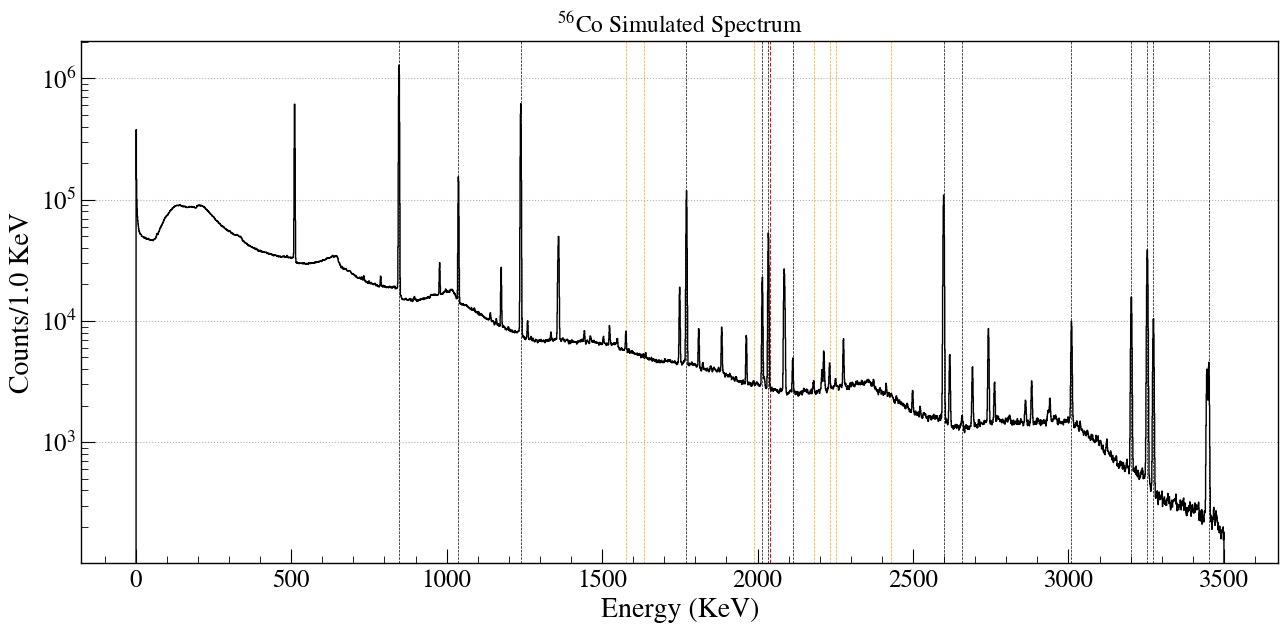

In [16]:
dets = [1010704]
E_dets = df[df['mage_id'].isin(dets)]['energy']

fig = plt.figure(figsize=(14,6))
ax = plt.gca()
# draw a dashed line on energies of each all_peaks
for peak in all_peaks:
    ax.axvline(peak['energy'], color='k', ls='--', lw=0.5)
# draw a dashed line on energies of each dep peak
for dep_peak in dep_peaks:
    ax.axvline(dep_peak['energy'], color='orange', ls='--', lw=0.5)
ax.axvline(2039, color='red', ls='--', lw=0.75)
hist, bins, vars = pgh.get_hist(E_dets, range=[0, 3500], dx=1)
binsize = bins[1]-bins[0]
pgh.plot_hist(hist, bins, color='k', lw=1)
ax.set_yscale('log')
ax.set_xlabel('Energy (KeV)')
ax.set_ylabel('Counts/'+str(round(binsize,2))+' KeV')
ax.set_title(r'$^{56}$Co Simulated Spectrum')
# turn x axis grid off
ax.xaxis.grid(False)

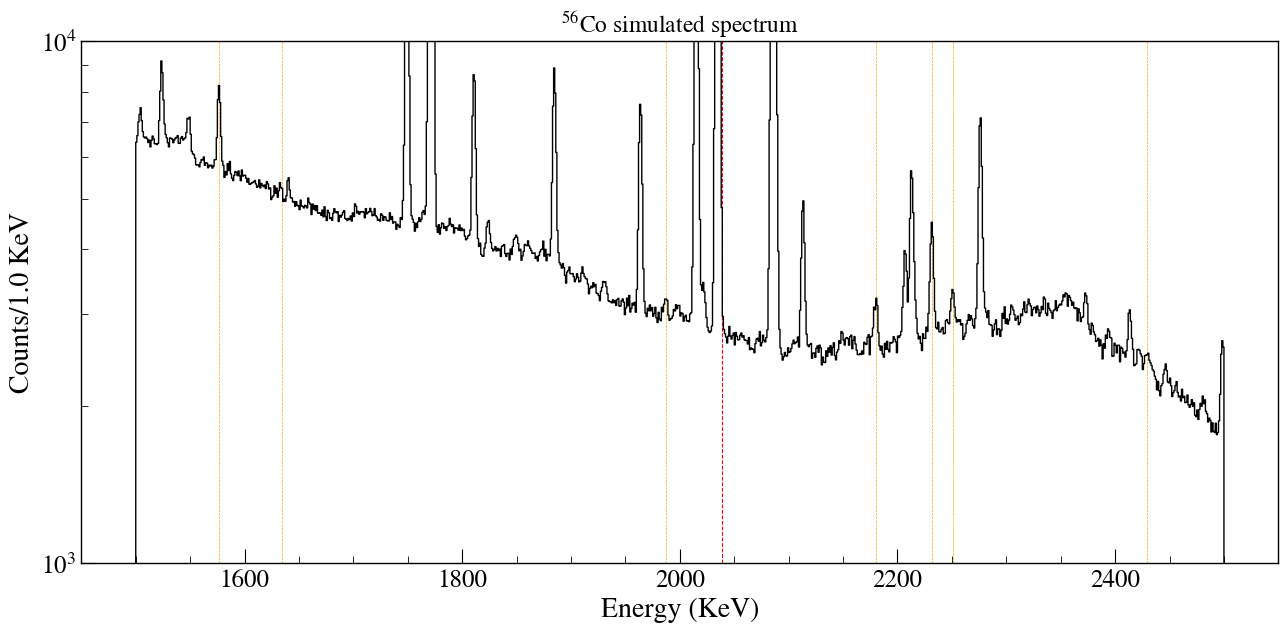

In [17]:
# dets = [1010704]
E_dets = df[df['mage_id'].isin(dets)]['energy']

fig = plt.figure(figsize=(14,6))
ax = plt.gca()
# draw a dashed line on energies of each dep peak
ax.axvline(2039, color='red', ls='--', lw=0.75)
for dep_peak in dep_peaks:
    ax.axvline(dep_peak['energy'], color='orange', ls='--', lw=0.5)
hist, bins, vars = pgh.get_hist(E_dets, range=[1500, 2500], dx=1)
binsize = bins[1]-bins[0]
pgh.plot_hist(hist, bins, color='k', lw=1)
ax.set_ylim(1000, 10000)
ax.set_yscale('log')
ax.set_xlabel('Energy (KeV)')
ax.set_ylabel('Counts/'+str(round(binsize,2))+' KeV')
ax.set_title(r'$^{56}$Co simulated spectrum')
ax.xaxis.grid(False)

[1572, 1582]
peak width: 7
peak_count: 48549
peak_count: 48549 sideband_count: 17214 sidband_width: 3
tau: 2.3333333333333335
[1630, 1640]
peak width: 6
peak_count: 30701
peak_count: 30701 sideband_count: 20678 sidband_width: 4
tau: 1.5
[1975, 2000]
peak width: 10
peak_count: 30647
peak_count: 30647 sideband_count: 14960 sidband_width: 5
tau: 2.0
[2174, 2187]
peak width: 9
peak_count: 25995
peak_count: 25995 sideband_count: 10352 sidband_width: 4
tau: 2.25
using fixed mu
A 182.7444852021515
[2220, 2240]
peak width: 12
peak_count: 40013
peak_count: 40013 sideband_count: 21628 sidband_width: 8
tau: 1.5
[2245, 2257]
peak width: 7
peak_count: 21840
peak_count: 21840 sideband_count: 11656 sidband_width: 4
tau: 1.75
using fixed mu
A 147.67568601156526
[2422, 2438]
peak width: 7
peak_count: 17336
peak_count: 17336 sideband_count: 14449 sidband_width: 6
tau: 1.1666666666666667
using fixed mu
A 53.3529805396765


,Peak,Intensity,N_sideband,B_sideband,tau,S_sideband,S_curve_fit,S_curve_fit_err,FWHM,FWHM_err
0,1576,16.670,48549,17214,2.333333,8383.000000,7611.241410,723.731469,3.004142,0.199775
1,1635,0.019,30701,20678,1.500000,-316.000000,NaN,NaN,NaN,NaN
2,1987,1.090,30647,14960,2.000000,727.000000,1371.067334,376.436173,4.536906,0.979897
3,2180,3.190,25995,10352,2.250000,2703.000000,2363.639749,745.723865,3.949311,0.856156
4,2231,7.920,40013,21628,1.500000,7571.000000,6275.993059,343.891839,3.397934,0.146390
5,2251,1.860,21840,11656,1.750000,1442.000000,1644.506262,463.159593,3.138692,0.654658
6,2429,0.950,17336,14449,1.166667,478.833333,498.512843,321.158654,3.511386,1.754128


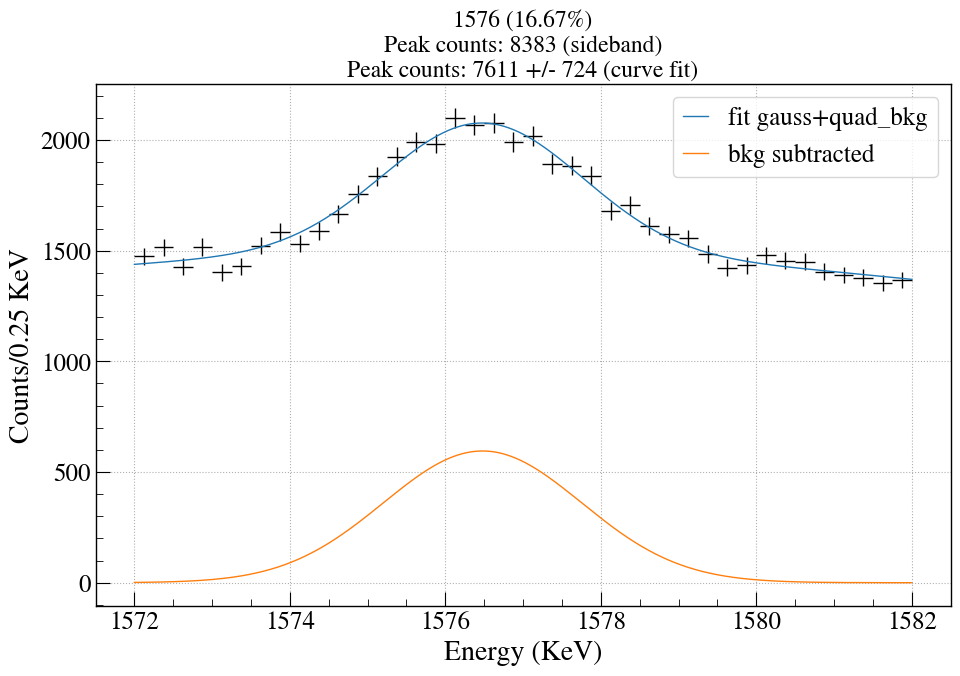

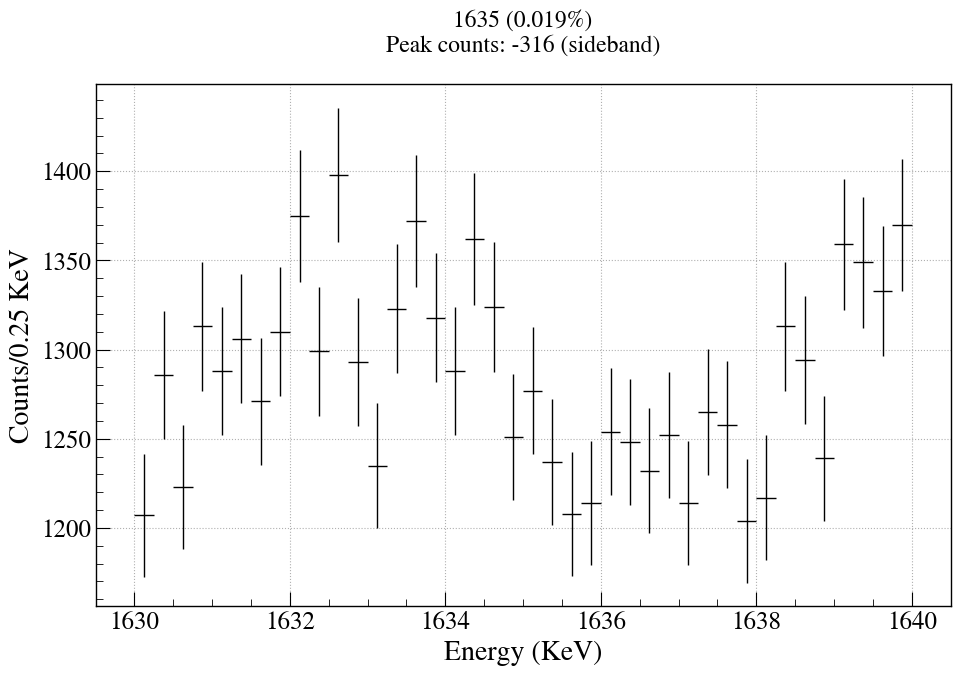

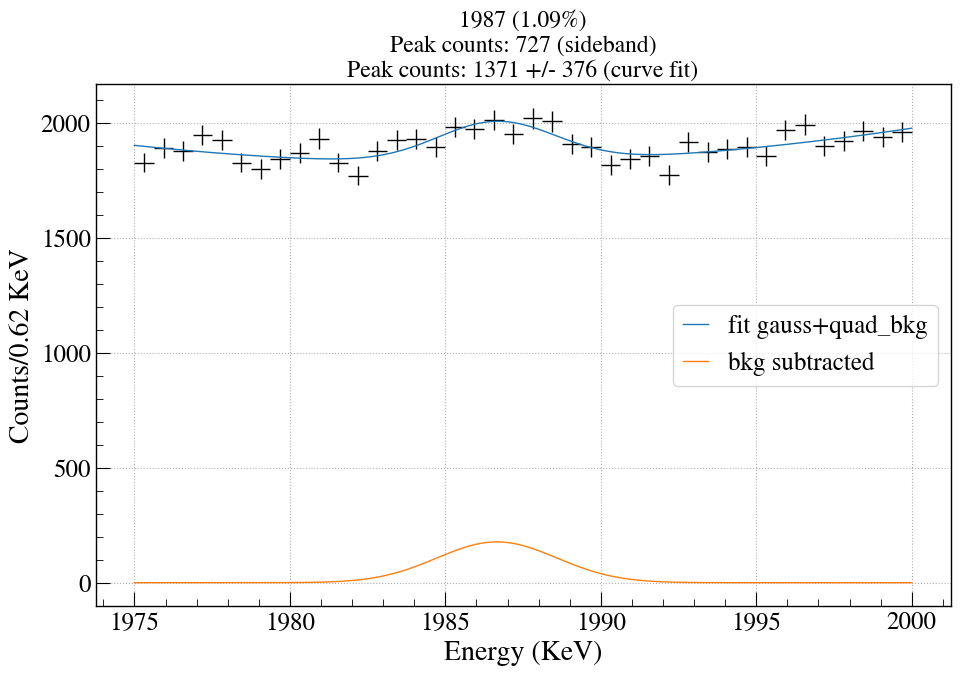

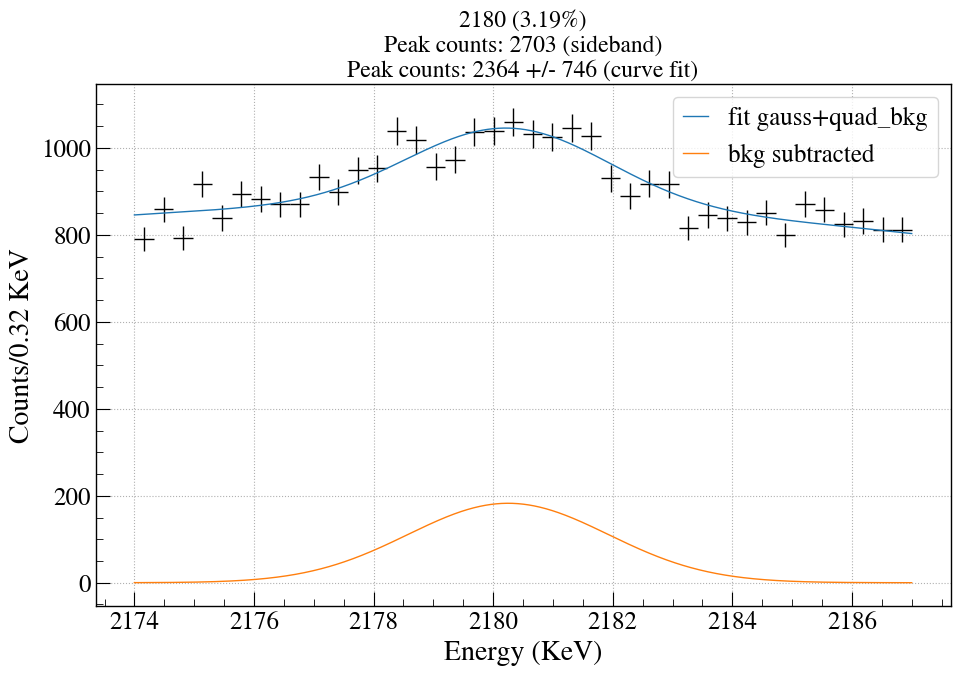

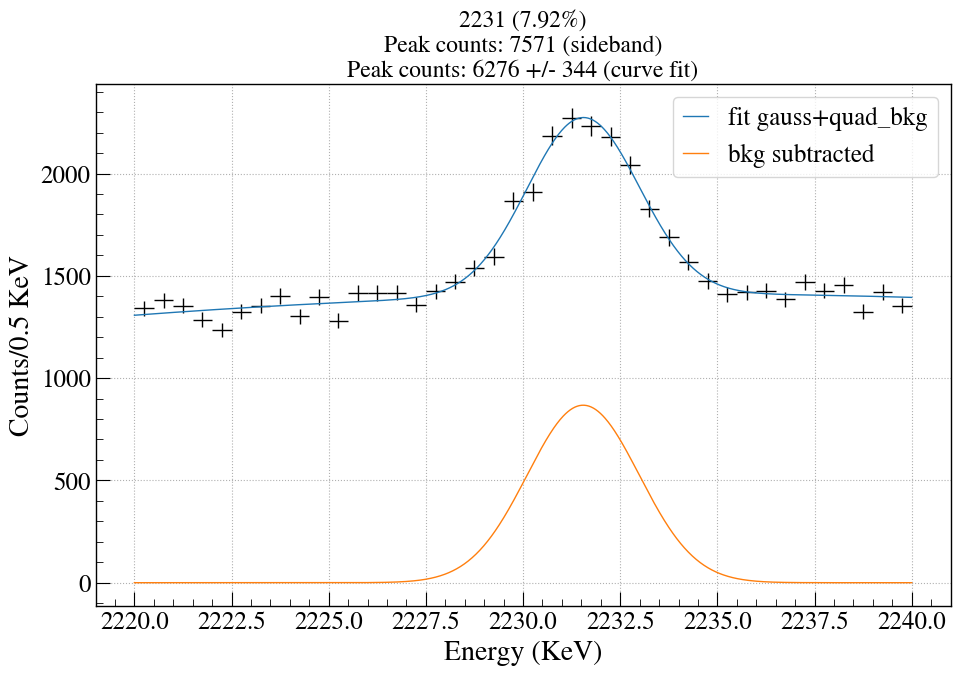

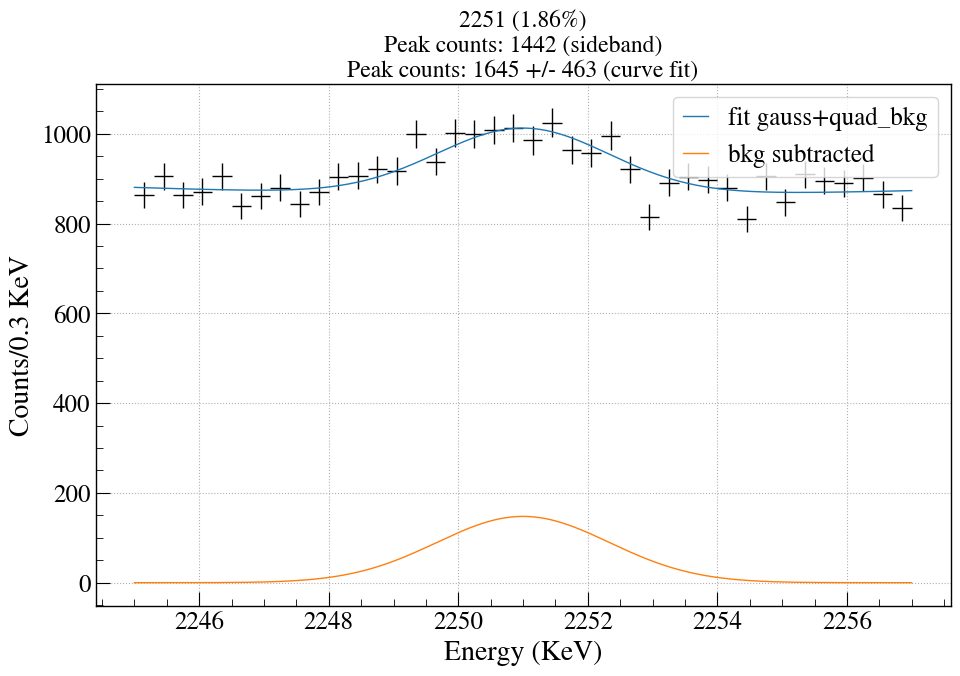

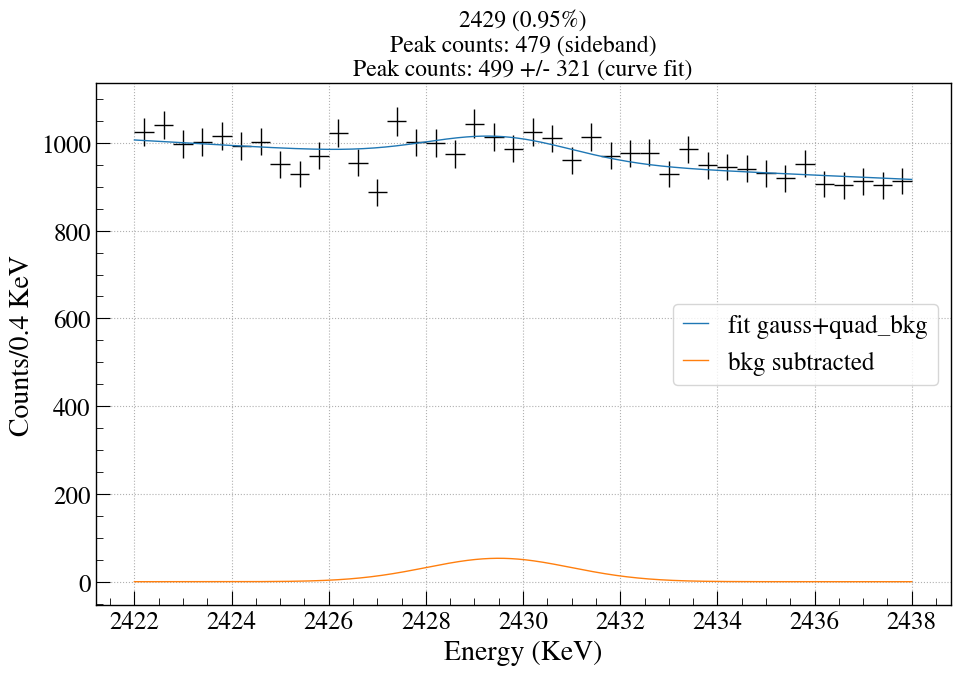

In [18]:
df_peak_counts = pd.DataFrame()
for i in range(len(dep_peaks)):
    peaks_to_consider = [0,1,2,3,4,5,6]
    # peaks_to_consider = [6]
    if i not in peaks_to_consider:
        continue
    peak = dep_peaks[i]
    E_dets = df[df['mage_id'].isin(dets)]['energy']
    print(peak['range'])
    E_peak = E_dets[(E_dets>peak['range'][0]) & (E_dets<peak['range'][1])]
    n_bins = 40
    h,b,v = pgh.get_hist(E_peak, range=peak['range'], dx=(peak['range'][1]-peak['range'][0])/n_bins)
    binsize = b[1]-b[0]
    
    fig = plt.figure(figsize=(10,6))
    ax = plt.gca()

    pgh.plot_hist(h, b,v, color='k', lw=1)
    ax.set_xlabel('Energy (KeV)')
    ax.set_ylabel('Counts/'+str(round(binsize,2))+' KeV')

    # sideband
    peak_width = peak['sideband_peak_range'][1]-peak['sideband_peak_range'][0]
    print('peak width:', peak_width)
    peak_count = len(E_peak[(E_peak>peak['sideband_peak_range'][0]) & (E_peak<peak['sideband_peak_range'][1])])
    print('peak_count:', peak_count)
    sideband_width = 0
    sideband_count = 0
    for sideband in peak['sidebands']:
        sideband_width += sideband[1]-sideband[0]
        sideband_count += len(E_peak[(E_dets>sideband[0]) & (E_peak<sideband[1])])
    print('peak_count:', peak_count, 'sideband_count:', sideband_count, 'sidband_width:', sideband_width)
    tau = peak_width/sideband_width
    print('tau:', tau)
    S = peak_count - tau*sideband_count
    # peak_count = round(peak_count)
    # sideband_count = round(sideband_count)
    # S = round(S)
    d = pd.DataFrame({'Peak':peak['name'],'Intensity':peak['intensity'], 'N_sideband': [round(peak_count)], 'B_sideband': [sideband_count],'tau': [tau], 'S_sideband': [S]})
    title_str_sideband = 'Peak counts: '+str(round(S))+' (sideband)'
    ax.set_title(peak['name']+' ('+str(peak['intensity'])+'%)\n'+title_str_sideband+'\n')
    if i in [1]:
        d['S_curve_fit'] = np.nan
        d['S_curve_fit_err'] = np.nan
        d['FWHM']= np.nan
        d['FWHM_err']= np.nan

    # curve fit
    try:
        peaks_with_mu_fixed = [ 3,5, 6]
        if i in peaks_with_mu_fixed:
            print('using fixed mu')
            mu = peak['energy']
            def gauss_with_mu_fixed(x, A, sigma):
                return A* np.exp(-(x-mu)**2 / (2*sigma**2))
            def gauss_with_quad_bkg_with_mu_fixed(x,  A, sigma, p0, p1, p2): 
                # bkg = p0 + p1*x + p2*x**2
                return gauss(x, A, mu, sigma) + quad_bkg(x, p0, p1, p2)
            b_mids = (b[1:]+b[:-1])/2
        
            guess = [peak['curve_fit_guess'][0], peak['curve_fit_guess'][2], peak['curve_fit_guess'][3], peak['curve_fit_guess'][4], peak['curve_fit_guess'][5]]
            popt, pcov = curve_fit(gauss_with_quad_bkg_with_mu_fixed, b_mids, h, p0=guess)
            perr = np.sqrt(np.diag(pcov))

            x = np.linspace(peak['range'][0], peak['range'][1], 1000)
            print('A', popt[0])
            
            
            total_fit_y = gauss_with_quad_bkg(x, popt[0], mu, popt[1], popt[2], popt[3], popt[4])
            ax.plot(x, total_fit_y, lw=1, label='fit gauss+quad_bkg')

            bkg = quad_bkg(x, *popt[2:])
            # bkg = quad_bkg(x, popt_fixed_mu[2:])
            bkg_subtracted_y = total_fit_y - bkg
            ax.plot(x, bkg_subtracted_y, lw=1, label='bkg subtracted')
            ax.legend()
            A = popt[0]
            sigma = popt[1]
            A_err = perr[0]
            sigma_err = perr[1]
            area = A*sigma*np.sqrt(2*np.pi)/binsize
            area = abs(area)
            area_err = area*np.sqrt((A_err/A)**2 + (sigma_err/sigma)**2)
            area_err = abs(area_err)
            title_str_curve_fit = 'Peak counts: '+str(round(area))+' +/- '+str(round(area_err))+' (curve fit)'
            d['S_curve_fit'] = abs(area)
            d['S_curve_fit_err'] = abs(area_err)
            d['FWHM']= abs(sigma*2.355)
            d['FWHM_err']= abs(sigma_err*2.355)
            ax.set_title(peak['name']+' ('+str(peak['intensity'])+'%)\n'+title_str_sideband+'\n'+title_str_curve_fit)

        elif i in [0,2, 4]:
        
            b_mids = (b[1:]+b[:-1])/2
            popt, pcov = curve_fit(gauss_with_quad_bkg, b_mids, h, p0=peak['curve_fit_guess'])
            perr = np.sqrt(np.diag(pcov))
            # popt_fixed_mu, pcov_fixed_mu = curve_fit(gauss_with_quad_bkg_with_mu_fixed, b_mids, h, p0=peak['curve_fit_guess_mu_fixed'])
            # perr_fixed_mu = np.sqrt(np.diag(pcov_fixed_mu))
            # print(popt_fixed_mu, perr_fixed_mu)
            x = np.linspace(peak['range'][0], peak['range'][1], 1000)
            total_fit_y = gauss_with_quad_bkg(x, *popt)
            ax.plot(x, total_fit_y, lw=1, label='fit gauss+quad_bkg')

            bkg = quad_bkg(x, *popt[3:])
            # bkg = quad_bkg(x, popt_fixed_mu[2:])
            bkg_subtracted_y = total_fit_y - bkg
            ax.plot(x, bkg_subtracted_y, lw=1, label='bkg subtracted')
            ax.legend()
            A = popt[0]
            sigma = popt[2]
            A_err = perr[0]
            sigma_err = perr[2]
            area = A*sigma*np.sqrt(2*np.pi)/binsize
            area = abs(area)
            area_err = area*np.sqrt((A_err/A)**2 + (sigma_err/sigma)**2)
            area_err = abs(area_err)
            title_str_curve_fit = 'Peak counts: '+str(round(area))+' +/- '+str(round(area_err))+' (curve fit)'
            d['S_curve_fit'] = abs(area)
            d['S_curve_fit_err'] = abs(area_err)
            d['FWHM']= abs(sigma*2.355)
            d['FWHM_err']= abs(perr[2]*2.355)
            ax.set_title(peak['name']+' ('+str(peak['intensity'])+'%)\n'+title_str_sideband+'\n'+title_str_curve_fit)
    except:
        title_str_curve_fit = ''
        d['S_curve_fit'] = np.nan
        d['S_curve_fit_err'] = np.nan
        d['FWHM']= np.nan
        d['FWHM_err']= np.nan
        print(peak['name'],'fit failed')

    df_peak_counts = pd.concat([df_peak_counts, d], ignore_index=True)
    
    # ax.set_title(peak['name']+' ('+str(peak['intensity'])+'%)\n'+title_str_sideband+'\n'+title_str_curve_fit)
    
df_peak_counts

In [19]:
df_to_print = df_peak_counts.copy()
df_to_print['tau'] = df_to_print['tau'].round(2)
df_to_print['S_sideband'] = df_to_print['S_sideband'].round()
df_to_print['S_curve_fit'] = df_to_print['S_curve_fit'].round()
df_to_print['S_curve_fit_err'] = df_to_print['S_curve_fit_err'].round()
df_to_print['FWHM'] = df_to_print['FWHM'].round(2)
df_to_print['FWHM_err'] = df_to_print['FWHM_err'].round(2)
df_to_print

,Peak,Intensity,N_sideband,B_sideband,tau,S_sideband,S_curve_fit,S_curve_fit_err,FWHM,FWHM_err
0,1576,16.670,48549,17214,2.33,8383.0,7611.0,724.0,3.00,0.20
1,1635,0.019,30701,20678,1.50,-316.0,NaN,NaN,NaN,NaN
2,1987,1.090,30647,14960,2.00,727.0,1371.0,376.0,4.54,0.98
3,2180,3.190,25995,10352,2.25,2703.0,2364.0,746.0,3.95,0.86
4,2231,7.920,40013,21628,1.50,7571.0,6276.0,344.0,3.40,0.15
5,2251,1.860,21840,11656,1.75,1442.0,1645.0,463.0,3.14,0.65
6,2429,0.950,17336,14449,1.17,479.0,499.0,321.0,3.51,1.75


1576 48549 17214 2.3333333333333335
1987 30647 14960 2.0
2180 25995 10352 2.25
2231 40013 21628 1.5
2251 21840 11656 1.75


,Peak,Intensity,N_sideband,B_sideband,S_sideband,S_curve_fit,FWHM
0,1576,16.67,48549,17214,8383.0,7611.0,3.00
2,1987,1.09,30647,14960,727.0,1371.0,4.54
3,2180,3.19,25995,10352,2703.0,2364.0,3.95
4,2231,7.92,40013,21628,7571.0,6276.0,3.40
5,2251,1.86,21840,11656,1442.0,1645.0,3.14


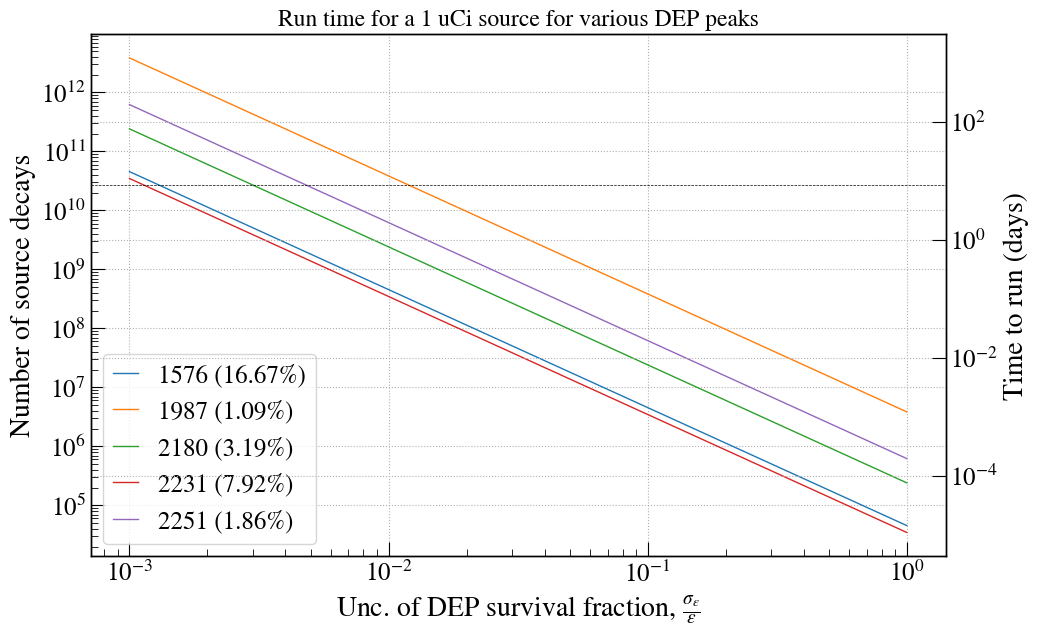

In [20]:
epsilon = 0.9
source_strength_uCi = 1 # uCi
source_strength_Bq = source_strength_uCi*37e3
rel_uncs = []
peaks_to_use = [0,2,3,4,5]
df_peak_counts_to_use = df_peak_counts.loc[peaks_to_use]
fig = plt.figure(figsize=(10,6))
ax = plt.gca()

for i in peaks_to_use:
    N = df_peak_counts_to_use['N_sideband'][i]
    B = df_peak_counts_to_use['B_sideband'][i]
    tau = df_peak_counts_to_use['tau'][i]
    print(df_peak_counts_to_use['Peak'][i],N,B,tau)
    N_c = N*epsilon
    B_c = B*epsilon

    rel_unc_sqrd = (N+tau**2*B)/(N-tau*B)**2 + (N_c+tau**2*B_c)/(N_c-tau*B_c)**2 - 2*(N_c+tau**2*B_c)/(N_c-tau*B_c)/(N-tau*B)
    rel_unc = np.sqrt(rel_unc_sqrd)
    rel_uncs.append(rel_unc)

    
    x = np.linspace(0.001, 1, 999)
    y = primaries*rel_unc**2/x**2
    ax.plot(x, y, lw=1, label=df_peak_counts_to_use['Peak'][i]+' ('+str(df_peak_counts_to_use['Intensity'][i])+'%)')
    ax.set_xlabel('Unc. of DEP survival fraction, '+r'$\frac{\sigma_{\epsilon}}{\epsilon}$')
    ax.set_ylabel('Number of source decays')
    ax.set_title('Run time for a '+str(source_strength_uCi)+' uCi source for various DEP peaks')
    ax.set_xscale('log')
    ax.set_yscale('log')
    

# get ylim

ylim = ax.get_ylim()
time_axis_ylim = [ylim[0]/source_strength_Bq/3600/24, ylim[1]/source_strength_Bq/3600/24]
# get twinx
ax2 = ax.twinx()
ax2.set_ylim(time_axis_ylim)
ax2.set_ylabel('Time to run (days)')
ax2.set_yscale('log')
ax2.yaxis.set_minor_formatter(FormatStrFormatter("%.1f"))
ax2.axhline(8.5, color='k', ls='--', lw=0.5)


ax.legend(loc='lower left')
df_peak_counts_to_use['rel_unc'] = rel_uncs
df_peak_counts_to_use['S_sideband'] = df_peak_counts_to_use['S_sideband'].round()
df_peak_counts_to_use['S_curve_fit'] = df_peak_counts_to_use['S_curve_fit'].round()
df_peak_counts_to_use['FWHM'] = df_peak_counts_to_use['FWHM'].round(2)

df_peak_counts_to_use[['Peak', 'Intensity', 'N_sideband', 'B_sideband', 'S_sideband', 'S_curve_fit', 'FWHM']]
    

15122.30935626472 5361.911332030338 2.3333333333333335
9546.096002831053 4659.823023537461 2.0
8097.06547438879 3224.4978569291306 2.25
12463.46916048158 6736.808312370869 1.5
6802.843237570732 3630.6749440075296 1.75


,Peak,N_sideband,B_sideband,S_sideband,N_sideband_cold,B_sideband_cold,S_sideband_cold
0,1576,48549,17214,8383.0,15122.0,5362.0,2611.0
2,1987,30647,14960,727.0,9546.0,4660.0,226.0
3,2180,25995,10352,2703.0,8097.0,3224.0,842.0
4,2231,40013,21628,7571.0,12463.0,6737.0,2358.0
5,2251,21840,11656,1442.0,6803.0,3631.0,449.0


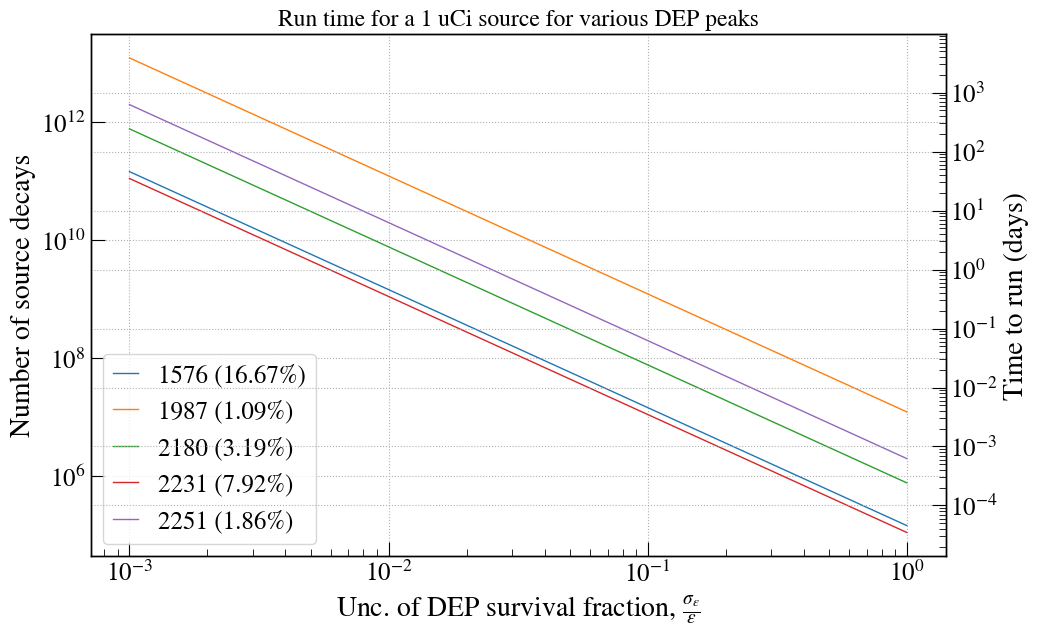

In [21]:
# source_strength_uCi = 1 # uCi
# source_strength_Bq = source_strength_uCi*37e3
peaks_to_use = [0,2,3,4,5]
df_peak_counts_to_use = df_peak_counts.loc[peaks_to_use]


hot_det_count = count_map['string 7'][4]
cold_det_count = count_map['string 8'][5]
cold_to_hot_ratio = cold_det_count/hot_det_count

df_peak_counts_to_use['N_sideband_cold'] = df_peak_counts_to_use['N_sideband']*cold_to_hot_ratio
df_peak_counts_to_use['B_sideband_cold'] = df_peak_counts_to_use['B_sideband']*cold_to_hot_ratio
df_peak_counts_to_use['S_sideband_cold'] = df_peak_counts_to_use['S_sideband']*cold_to_hot_ratio

epsilon = 0.9
rel_uncs = []

fig = plt.figure(figsize=(10,6))
ax = plt.gca()
for i in peaks_to_use:
    N = df_peak_counts_to_use['N_sideband_cold'][i]
    B = df_peak_counts_to_use['B_sideband_cold'][i]
    tau = df_peak_counts_to_use['tau'][i]
    print(N,B,tau)
    N_c = N*epsilon
    B_c = B*epsilon

    rel_unc_sqrd = (N+tau**2*B)/(N-tau*B)**2 + (N_c+tau**2*B_c)/(N_c-tau*B_c)**2 - 2*(N_c+tau**2*B_c)/(N_c-tau*B_c)/(N-tau*B)
    rel_unc = np.sqrt(rel_unc_sqrd)
    rel_uncs.append(rel_unc)

    
    x = np.linspace(0.001, 1, 999)
    y = primaries*rel_unc**2/x**2
    ax.plot(x, y, lw=1, label=df_peak_counts_to_use['Peak'][i]+' ('+str(df_peak_counts_to_use['Intensity'][i])+'%)')
    ax.set_xlabel('Unc. of DEP survival fraction, '+r'$\frac{\sigma_{\epsilon}}{\epsilon}$')
    ax.set_ylabel('Number of source decays')
    ax.set_title('Run time for a '+str(source_strength_uCi)+' uCi source for various DEP peaks')
    ax.set_xscale('log')
    ax.set_yscale('log')

# get ylim
ylim = ax.get_ylim()
time_axis_ylim = [ylim[0]/source_strength_Bq/3600/24, ylim[1]/source_strength_Bq/3600/24]
# get twinx
ax2 = ax.twinx()
ax2.set_ylim(time_axis_ylim)
ax2.set_ylabel('Time to run (days)')
ax2.set_yscale('log')

ax.legend(loc='lower left')
df_peak_counts_to_use['rel_unc_cold'] = rel_uncs
df_peak_counts_to_use = df_peak_counts_to_use.round()
df_peak_counts_to_use[['Peak', 'N_sideband','B_sideband', 'S_sideband', 'N_sideband_cold','B_sideband_cold', 'S_sideband_cold']]

(0.0, 6.0)

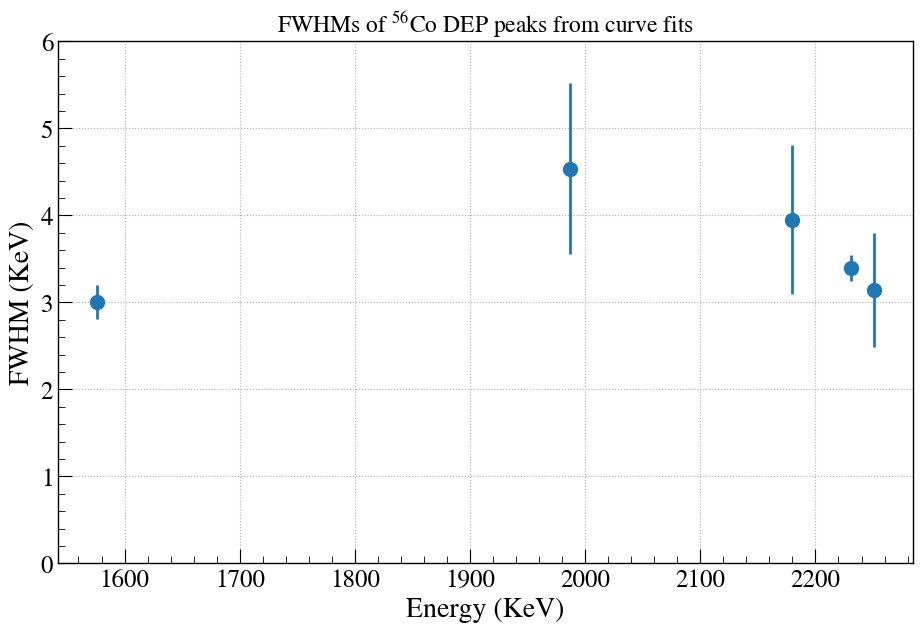

In [22]:
fig = plt.figure(figsize=(10,6))
ax = plt.gca()
peak_vals = []
fwhms = []
fwhm_errs = []
for i in peaks_to_use:
    if str(df_peak_counts['FWHM'][i])=='nan':
        continue
    peak_val = int(df_peak_counts['Peak'][i])
    peak_vals.append(peak_val)
    fwhm = df_peak_counts['FWHM'][i]
    fwhms.append(fwhm)
    fwhm_err = df_peak_counts['FWHM_err'][i]
    fwhm_errs.append(fwhm_err)
ax.errorbar(peak_vals, fwhms, yerr=fwhm_errs, marker='o', lw=2, ls='none',label=df_peak_counts['Peak'][i]+' ('+str(df_peak_counts['Intensity'][i])+'%)')
ax.set_xlabel('Energy (KeV)')
ax.set_ylabel('FWHM (KeV)')
ax.set_title(r'FWHMs of $^{56}$Co DEP peaks from curve fits')
ax.set_ylim(0,6)

# E_cals = [int(df_peak_counts['Peak'][i]) for i in range(len(df_peak_counts))]
# E_cals = np.array(E_cals)
# popt, pcov = curve_fit(fwhm_func, E_cals, fwhms)
# print(popt)
# x = np.linspace(E_cals[0], E_cals[-1], 1000)
# y = fwhm_func(x, *popt)
# ax.plot(x, y, lw=1, label='Fit', p0=[2,0.1,0.01])
    

In [23]:
df_peak_counts['tau'] = df_peak_counts['tau'].round(1)
df_peak_counts['FWHM'] = df_peak_counts['FWHM'].round(2)
df_peak_counts['FWHM_err'] = df_peak_counts['FWHM_err'].round(2)
df_peak_counts['S_sideband'] = df_peak_counts['S_sideband'].round(0)
df_peak_counts['S_curve_fit'] = df_peak_counts['S_curve_fit'].round(0)
df_peak_counts['S_curve_fit_err'] = df_peak_counts['S_curve_fit_err'].round(0)
df_peak_counts[['Peak', 'Intensity', 'N_sideband','B_sideband', 'S_sideband', 'S_curve_fit', 'S_curve_fit_err','FWHM', 'FWHM_err',]]
df_peak_counts[['Peak','FWHM', 'FWHM_err']]

,Peak,FWHM,FWHM_err
0,1576,3.00,0.20
1,1635,NaN,NaN
2,1987,4.54,0.98
3,2180,3.95,0.86
4,2231,3.40,0.15
5,2251,3.14,0.65
6,2429,3.51,1.75


In [24]:
N_p = 121000000 #primaries
event_rate_map = count_map/N_p*source_strength_Bq
event_rate_map = event_rate_map.round(1)
event_rate_map = lu.attach_det_type_map(event_rate_map)
event_rate_map

,string 1,string 2,string 3,string 4,string 5,string 7,string 8,string 9,string 10,string 11
1,V:53.0,B:18.4,B:20.7,B:23.5,V:69.3,V:139.1,B:41.0,B:32.3,B:35.3,B:20.5
2,V:98.4,C:71.9,B:29.8,B:41.9,V:316.5,V:506.4,B:58.1,B:48.0,B:53.6,B:37.6
3,V:203.1,C:127.7,P:56.1,B:57.5,V:1125.6,V:3118.5,C:518.5,B:91.0,B:80.3,B:43.4
4,V:242.4,C:236.0,P:84.8,B:79.4,V:1529.7,V:18526.9,V:1846.6,B:175.6,B:129.1,P:118.2
5,V:227.3,C:285.7,P:141.8,B:131.0,V:1437.4,V:4704.3,V:5770.9,P:459.5,B:188.6,P:181.3
6,V:154.8,C:218.9,P:162.7,B:162.1,.,V:746.2,V:5210.3,P:922.6,B:303.1,P:250.5
7,V:103.2,V:100.8,P:170.3,B:214.4,.,V:148.0,V:1072.2,P:1355.3,B:383.6,P:221.2
8,V:47.1,V:49.3,P:122.7,V:332.3,.,.,V:325.4,P:976.3,B:369.6,P:178.7
9,V:22.6,V:25.5,P:90.6,V:299.3,.,.,V:122.8,P:507.0,V:875.9,P:115.8
10,.,.,.,V:181.4,.,.,V:34.3,P:247.9,V:519.0,P:78.0


In [25]:
all_peaks[0]

{'name': '846',
 'energy': 846.8,
 'intensity': 100,
 'range': [835, 855],
 'curve_fit_guess': [1000, 846.8, 1, 0, 0, 0],
 'sidebands': [[835, 840], [852, 855]],
 'sideband_peak_range': [843, 850.5]}

846 [835, 855]
peak width: 7.5
peak_count: 3875304
peak_count: 3875304 sideband_count: 141002 sidband_width: 8
tau: 0.9375
1037 [1025, 1045]
peak width: 8
peak_count: 555872
peak_count: 555872 sideband_count: 109717 sidband_width: 7
tau: 1.1428571428571428
1238 [1228, 1248]
peak width: 8.5
peak_count: 2012040
peak_count: 2012040 sideband_count: 55129 sidband_width: 7
tau: 1.2142857142857142
1771 [1760, 1780]
peak width: 9.5
peak_count: 441351
peak_count: 441351 sideband_count: 36161 sidband_width: 8
tau: 1.1875
2015 [2005, 2025]
peak width: 10
peak_count: 103623
peak_count: 103623 sideband_count: 18252 sidband_width: 6
tau: 1.6666666666666667
2034 [2025, 2045]
peak width: 10
peak_count: 214781
peak_count: 214781 sideband_count: 19231 sidband_width: 7
tau: 1.4285714285714286
2113 [2106, 2120]
peak width: 9.5
peak_count: 33195
peak_count: 33195 sideband_count: 7933 sidband_width: 3
tau: 3.1666666666666665
2598 [2588, 2608]
peak width: 11
peak_count: 443911
peak_count: 443911 sideband_cou

,Peak,Intensity,N_sideband,B_sideband,tau,S_sideband,S_curve_fit,S_curve_fit_err,FWHM,FWHM_err
0,846,100.000,3875304,141002,0.937500,3.743115e+06,3.743220e+06,1466.417616,2.626316,0.000805
1,1037,14.300,555872,109717,1.142857,4.304811e+05,4.406419e+05,676.908366,2.765454,0.003321
2,1238,66.500,2012040,55129,1.214286,1.945098e+06,1.943365e+06,1221.497775,2.893140,0.001430
3,1771,15.400,441351,36161,1.187500,3.984098e+05,3.993762e+05,1204.885148,3.227486,0.007657
4,2015,3.015,103623,18252,1.666667,7.320300e+04,7.260610e+04,546.967346,3.318349,0.019694
5,2034,7.770,214781,19231,1.428571,1.873081e+05,1.871251e+05,494.337405,3.368753,0.007011
6,2113,0.377,33195,7933,3.166667,8.073833e+03,8.579377e+03,449.339387,3.274065,0.131448
7,2598,16.670,443911,9298,1.833333,4.268647e+05,4.255879e+05,1100.050534,3.672917,0.007466
8,2657,0.019,7817,10856,0.625000,1.032000e+03,4.991278e+02,144.758693,1.981995,0.451016
9,3009,1.040,53271,6968,2.300000,3.724460e+04,3.562403e+04,384.265812,3.903762,0.033028


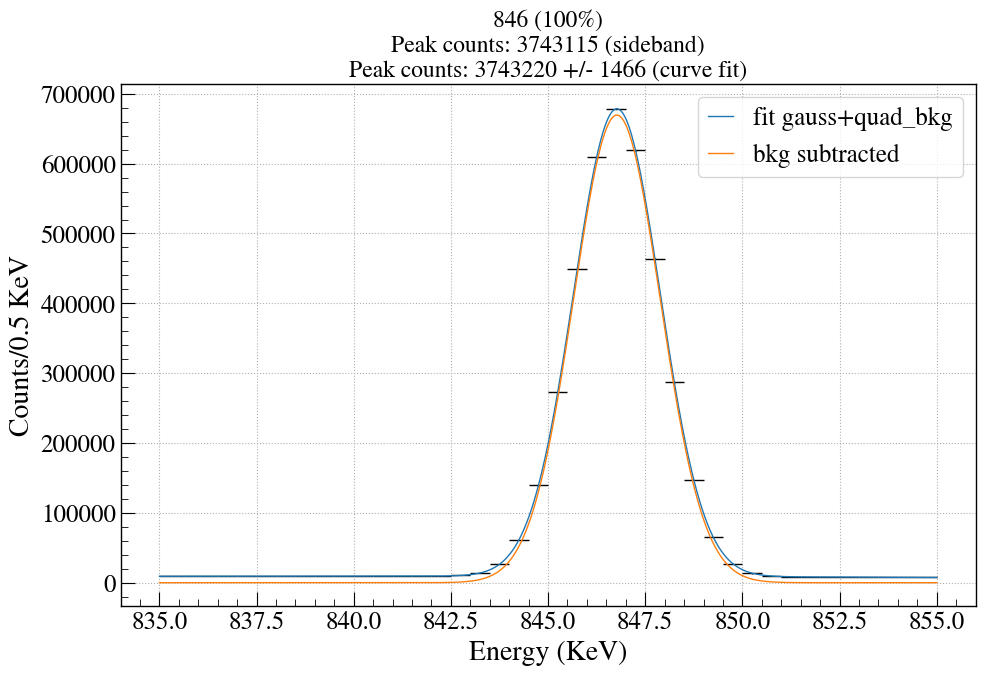

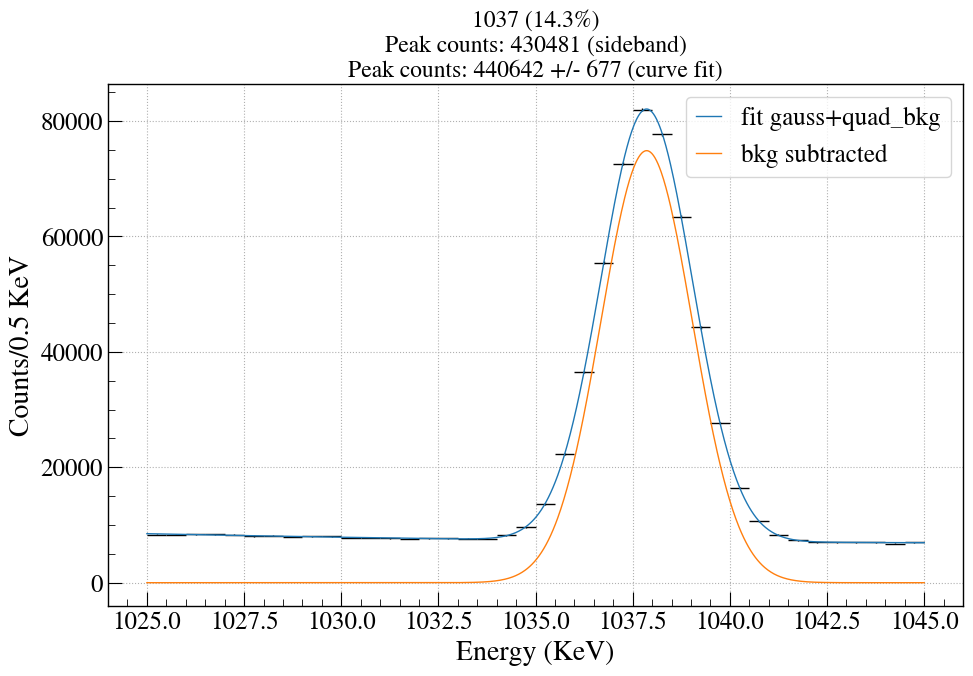

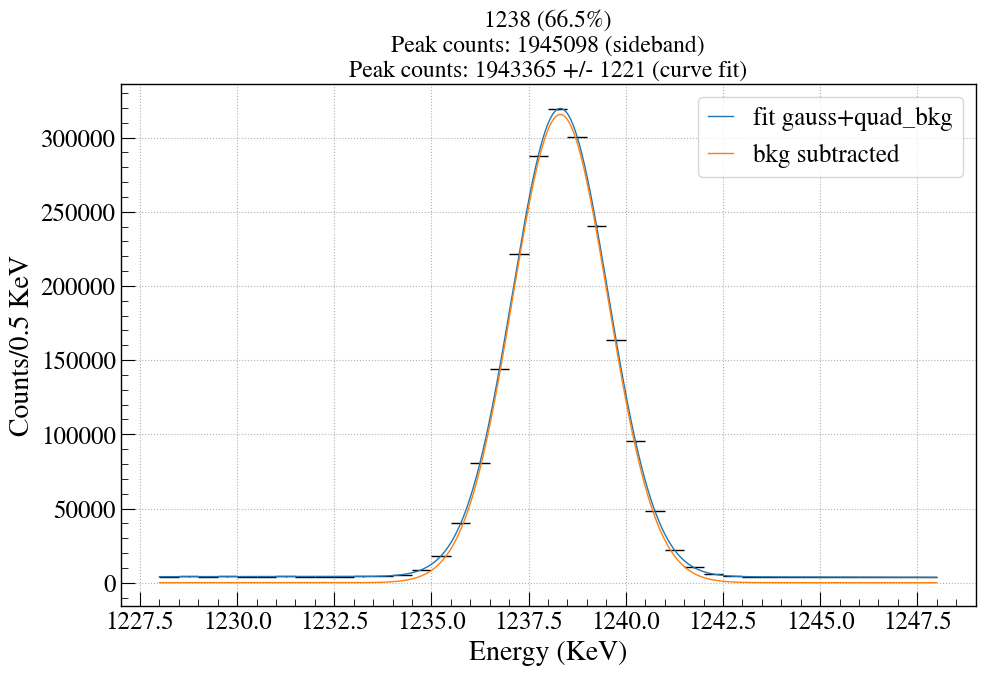

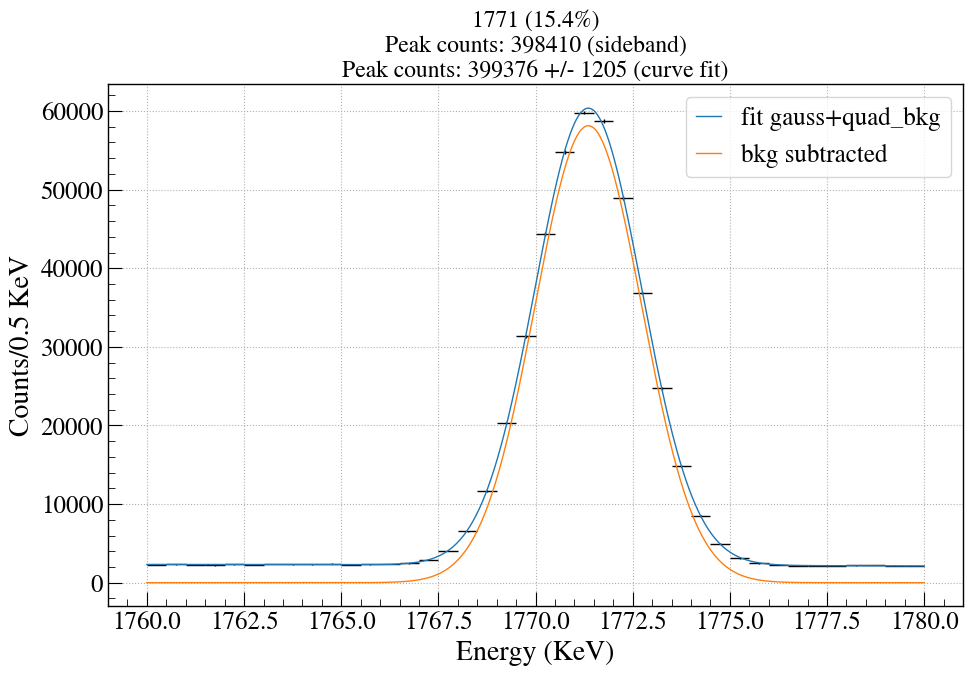

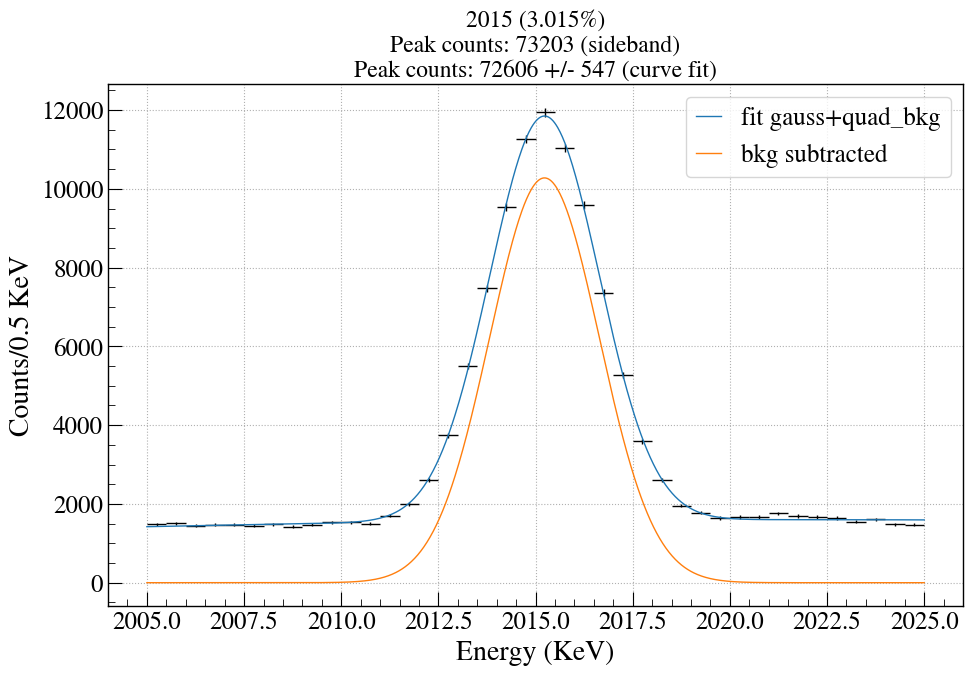

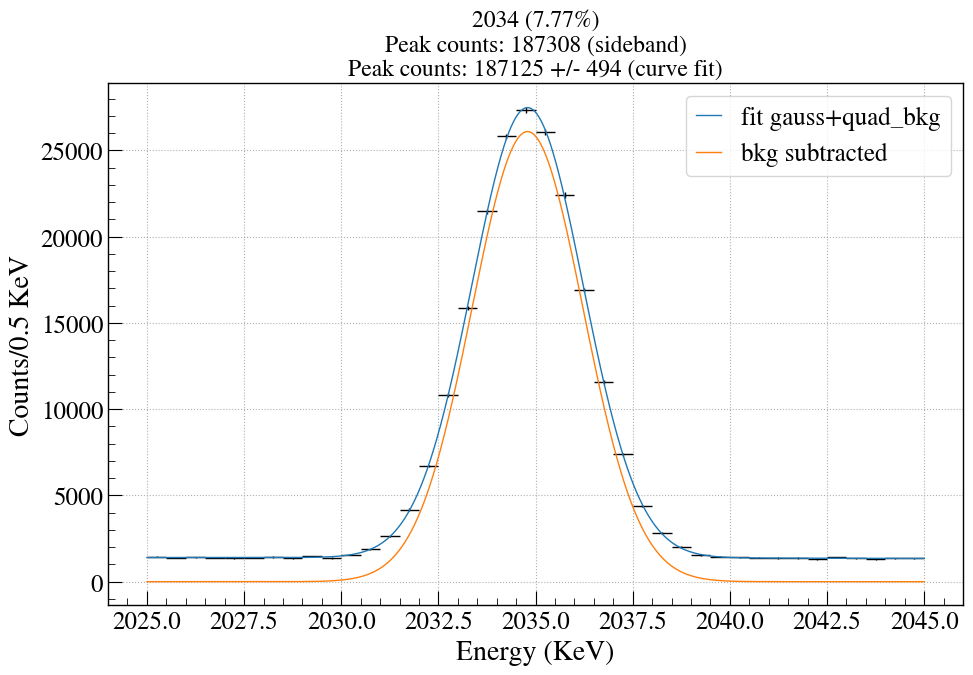

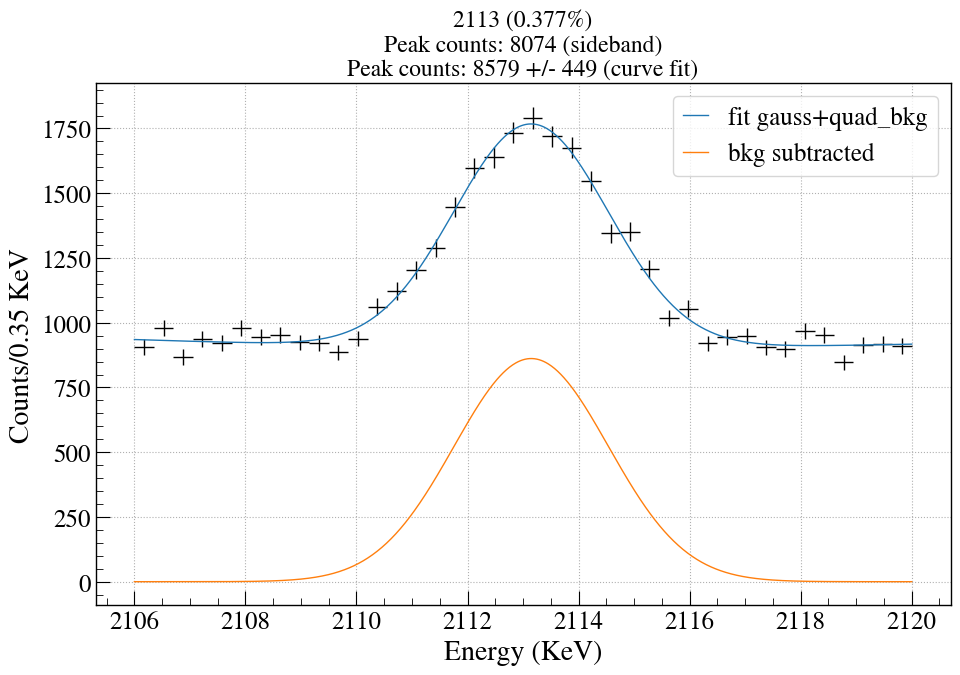

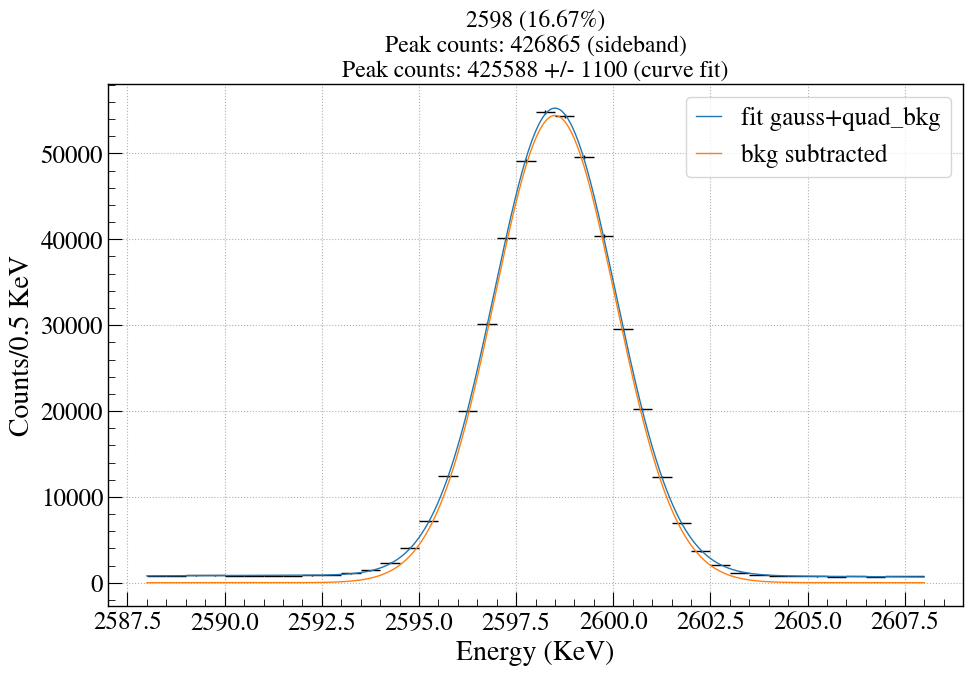

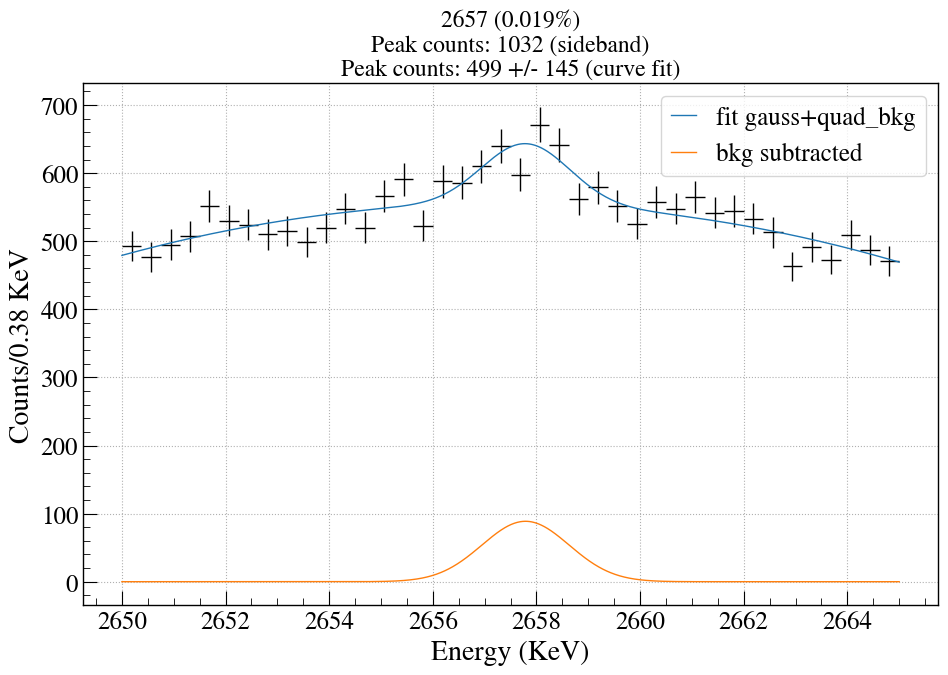

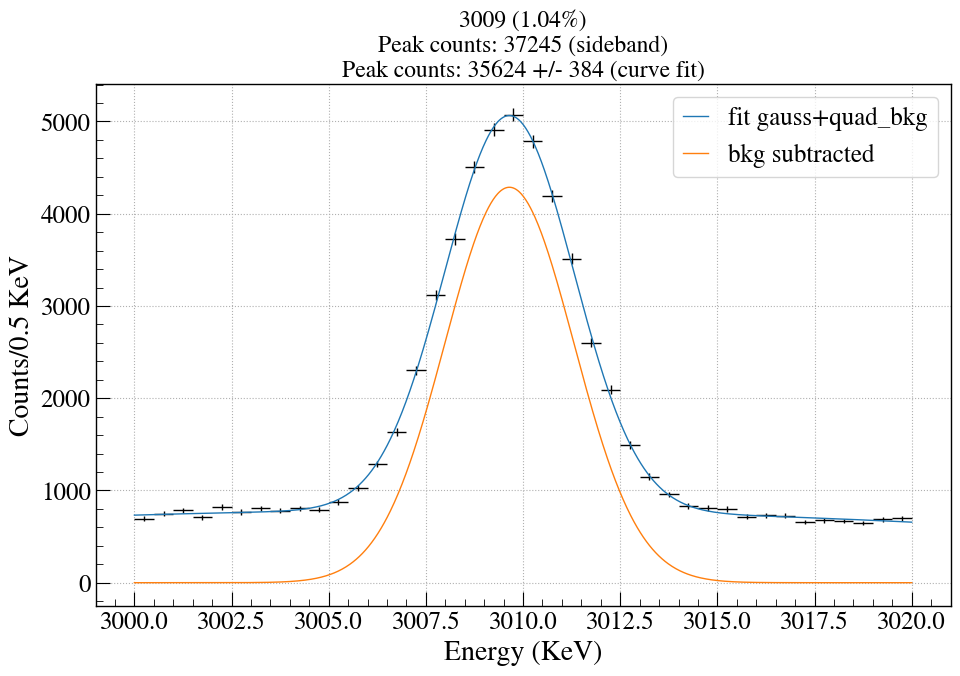

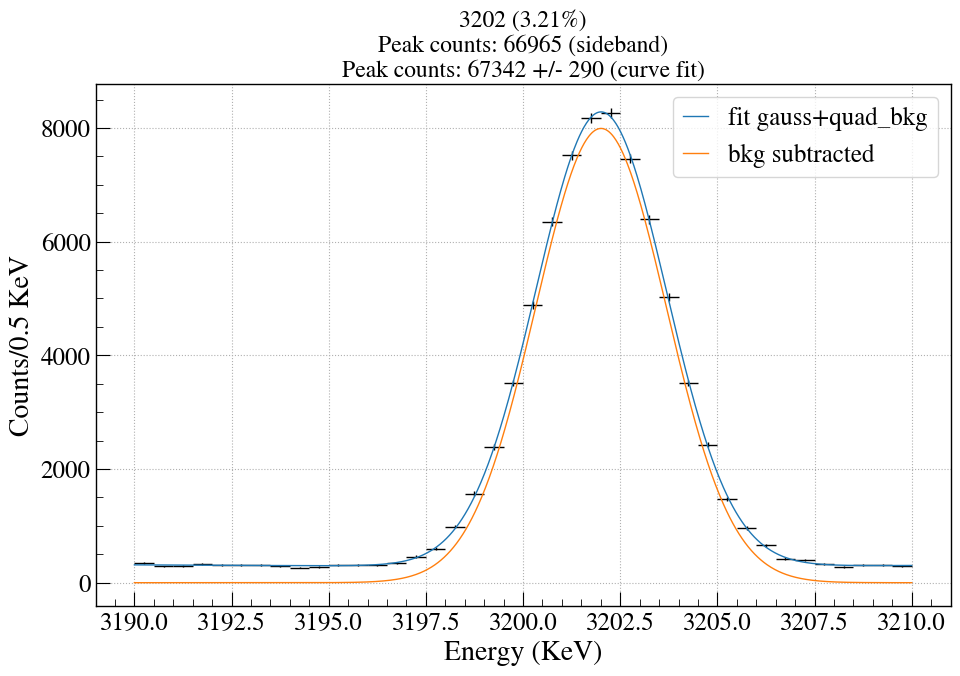

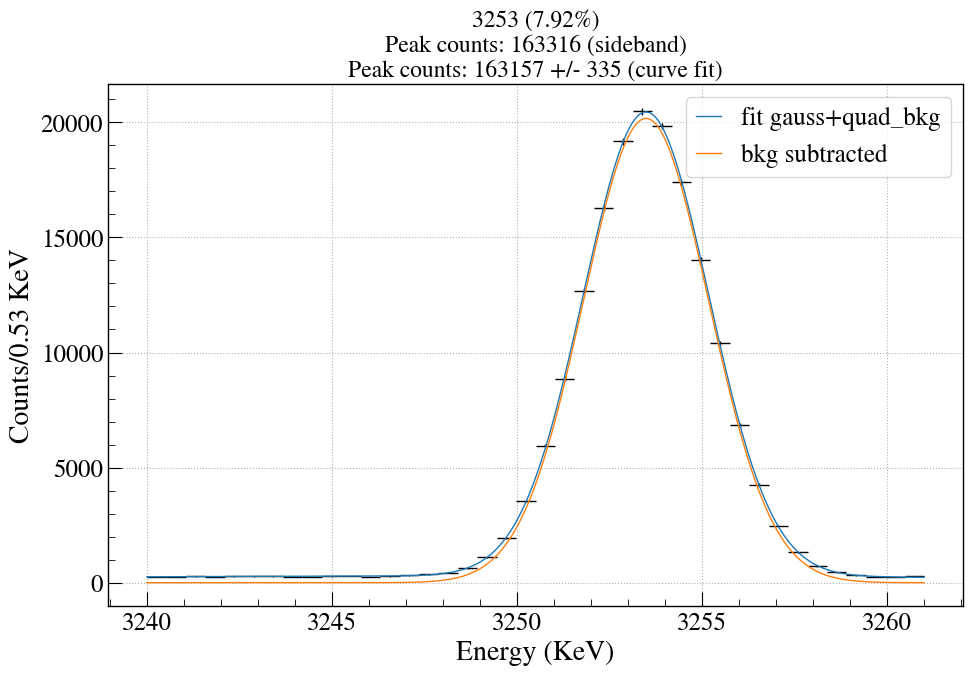

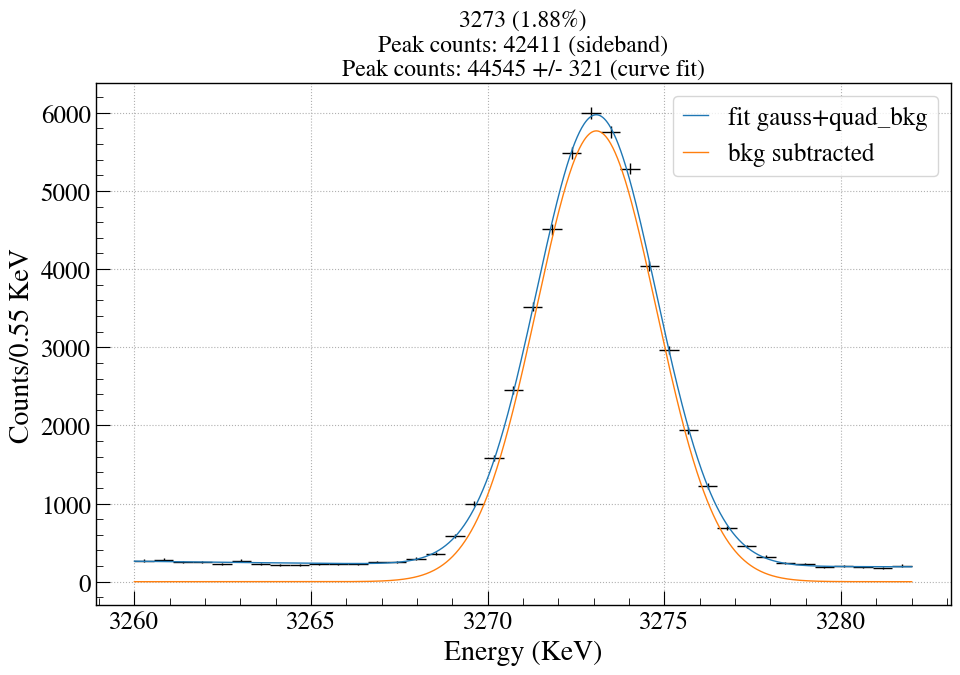

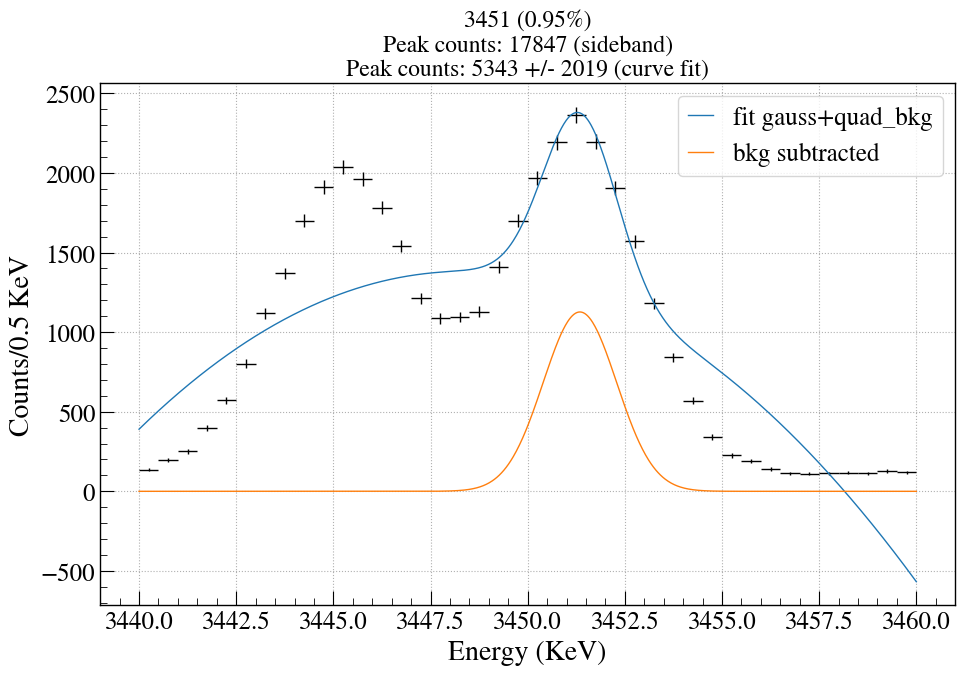

In [26]:
df_all_peak_counts = pd.DataFrame()
for i in range(len(all_peaks)):
    peaks_to_consider = [0,1,2,3,4,5,6,7,8,9,10,11,12,13]
    if i not in peaks_to_consider:
        continue
    peak = all_peaks[i]
    E_dets = df[df['mage_id'].isin(dets)]['energy']
    print(peak['name'], peak['range'])
    E_peak = E_dets[(E_dets>peak['range'][0]) & (E_dets<peak['range'][1])]
    n_bins = 40
    h,b,v = pgh.get_hist(E_peak, range=peak['range'], dx=(peak['range'][1]-peak['range'][0])/n_bins)
    binsize = b[1]-b[0]
    
    fig = plt.figure(figsize=(10,6))
    ax = plt.gca()

    pgh.plot_hist(h, b,v, color='k', lw=1)
    ax.set_xlabel('Energy (KeV)')
    ax.set_ylabel('Counts/'+str(round(binsize,2))+' KeV')

    # sideband
    peak_width = peak['sideband_peak_range'][1]-peak['sideband_peak_range'][0]
    print('peak width:', peak_width)
    peak_count = len(E_peak[(E_peak>peak['sideband_peak_range'][0]) & (E_peak<peak['sideband_peak_range'][1])])
    print('peak_count:', peak_count)
    sideband_width = 0
    sideband_count = 0
    for sideband in peak['sidebands']:
        sideband_width += sideband[1]-sideband[0]
        sideband_count += len(E_peak[(E_dets>sideband[0]) & (E_peak<sideband[1])])
    print('peak_count:', peak_count, 'sideband_count:', sideband_count, 'sidband_width:', sideband_width)
    tau = peak_width/sideband_width
    print('tau:', tau)
    S = peak_count - tau*sideband_count
    # peak_count = round(peak_count)
    # sideband_count = round(sideband_count)
    # S = round(S)
    d = pd.DataFrame({'Peak':peak['name'],'Intensity':peak['intensity'], 'N_sideband': [round(peak_count)], 'B_sideband': [sideband_count],'tau': [tau], 'S_sideband': [S]})
    title_str_sideband = 'Peak counts: '+str(round(S))+' (sideband)'
    ax.set_title(peak['name']+' ('+str(peak['intensity'])+'%)\n'+title_str_sideband+'\n')
    if i in [1]:
        d['S_curve_fit'] = np.nan
        d['S_curve_fit_err'] = np.nan
        d['FWHM']= np.nan
        d['FWHM_err']= np.nan

    # curve fit
    try:
        b_mids = (b[1:]+b[:-1])/2
        popt, pcov = curve_fit(gauss_with_quad_bkg, b_mids, h, p0=peak['curve_fit_guess'])
        perr = np.sqrt(np.diag(pcov))
        
        x = np.linspace(peak['range'][0], peak['range'][1], 1000)
        total_fit_y = gauss_with_quad_bkg(x, *popt)
        ax.plot(x, total_fit_y, lw=1, label='fit gauss+quad_bkg')

        bkg = quad_bkg(x, *popt[3:])
        # bkg = quad_bkg(x, popt_fixed_mu[2:])
        bkg_subtracted_y = total_fit_y - bkg
        ax.plot(x, bkg_subtracted_y, lw=1, label='bkg subtracted')
        ax.legend()
        A = popt[0]
        sigma = popt[2]
        A_err = perr[0]
        sigma_err = perr[2]
        area = A*sigma*np.sqrt(2*np.pi)/binsize
        area = abs(area)
        area_err = area*np.sqrt((A_err/A)**2 + (sigma_err/sigma)**2)
        area_err = abs(area_err)
        title_str_curve_fit = 'Peak counts: '+str(round(area))+' +/- '+str(round(area_err))+' (curve fit)'
        d['S_curve_fit'] = abs(area)
        d['S_curve_fit_err'] = abs(area_err)
        d['FWHM']= abs(sigma*2.355)
        d['FWHM_err']= abs(perr[2]*2.355)
        ax.set_title(peak['name']+' ('+str(peak['intensity'])+'%)\n'+title_str_sideband+'\n'+title_str_curve_fit)
    except:
        title_str_curve_fit = ''
        d['S_curve_fit'] = np.nan
        d['S_curve_fit_err'] = np.nan
        d['FWHM']= np.nan
        d['FWHM_err']= np.nan
        print(peak['name'],'fit failed')

    df_all_peak_counts = pd.concat([df_all_peak_counts, d], ignore_index=True)
    
    # ax.set_title(peak['name']+' ('+str(peak['intensity'])+'%)\n'+title_str_sideband+'\n'+title_str_curve_fit)
    
df_all_peak_counts

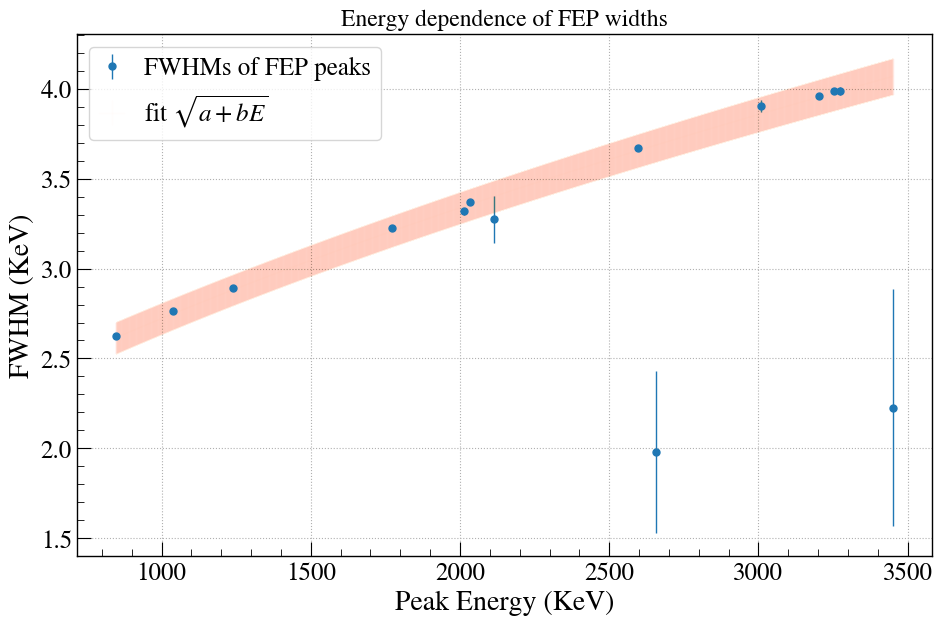

In [27]:
fig = plt.figure(figsize=(10,6))
ax = plt.gca()
ax.errorbar(df_all_peak_counts['Peak'].astype(float), df_all_peak_counts['FWHM'], yerr=df_all_peak_counts['FWHM_err'], fmt='.', lw=1, label='FWHMs of FEP peaks')
ax.set_xlabel('Peak Energy (KeV)')
ax.set_ylabel('FWHM (KeV)')
ax.set_title('Energy dependence of FEP widths')

def fwhm_fit(x, a, b, c, d):
    return np.sqrt(a**2 + b**2*x**2 + c**4*x**4 + d**6*x**6)
def fwhm_fit(x, a,b):
    return np.sqrt(a + b*x)
D = df_all_peak_counts.copy()
D = D.drop([8,13])
popt, pcov = curve_fit(fwhm_fit, D['Peak'].astype(float), D['FWHM'], p0=[3.5,0.004])
perr = np.sqrt(np.diag(pcov))
a = popt[0]
b = popt[1]
a_err = perr[0]
b_err = perr[1]
x = np.linspace(846, 3451, 10000)
y = fwhm_fit(x, *popt)
y_err = np.sqrt((a_err**2/(a+b*x)) + x*x*b_err**2/(a+b*x))
ax.errorbar(x, y,yerr=y_err, lw=1, alpha=0.01, label=r'fit $\sqrt{a+bE}$')
ax.legend()

In [28]:
df_all_peak_counts['Intensity']=df_all_peak_counts['Intensity'].round(2)
df_all_peak_counts['tau']=df_all_peak_counts['tau'].round(1)
df_all_peak_counts['S_sideband']=df_all_peak_counts['S_sideband'].round(1)
df_all_peak_counts['S_curve_fit']=df_all_peak_counts['S_curve_fit'].round(1)
df_all_peak_counts['S_curve_fit_err']=df_all_peak_counts['S_curve_fit_err'].round(1)
df_all_peak_counts['FWHM']=df_all_peak_counts['FWHM'].round(3)
df_all_peak_counts['FWHM_err']=df_all_peak_counts['FWHM_err'].round(3)
df_all_peak_counts


,Peak,Intensity,N_sideband,B_sideband,tau,S_sideband,S_curve_fit,S_curve_fit_err,FWHM,FWHM_err
0,846,100.00,3875304,141002,0.9,3743114.6,3743220.4,1466.4,2.626,0.001
1,1037,14.30,555872,109717,1.1,430481.1,440641.9,676.9,2.765,0.003
2,1238,66.50,2012040,55129,1.2,1945097.6,1943364.7,1221.5,2.893,0.001
3,1771,15.40,441351,36161,1.2,398409.8,399376.2,1204.9,3.227,0.008
4,2015,3.02,103623,18252,1.7,73203.0,72606.1,547.0,3.318,0.020
5,2034,7.77,214781,19231,1.4,187308.1,187125.1,494.3,3.369,0.007
6,2113,0.38,33195,7933,3.2,8073.8,8579.4,449.3,3.274,0.131
7,2598,16.67,443911,9298,1.8,426864.7,425587.9,1100.1,3.673,0.007
8,2657,0.02,7817,10856,0.6,1032.0,499.1,144.8,1.982,0.451
9,3009,1.04,53271,6968,2.3,37244.6,35624.0,384.3,3.904,0.033


In [29]:

D

,Peak,Intensity,N_sideband,B_sideband,tau,S_sideband,S_curve_fit,S_curve_fit_err,FWHM,FWHM_err
0,846,100.000,3875304,141002,0.937500,3.743115e+06,3.743220e+06,1466.417616,2.626316,0.000805
1,1037,14.300,555872,109717,1.142857,4.304811e+05,4.406419e+05,676.908366,2.765454,0.003321
2,1238,66.500,2012040,55129,1.214286,1.945098e+06,1.943365e+06,1221.497775,2.893140,0.001430
3,1771,15.400,441351,36161,1.187500,3.984098e+05,3.993762e+05,1204.885148,3.227486,0.007657
4,2015,3.015,103623,18252,1.666667,7.320300e+04,7.260610e+04,546.967346,3.318349,0.019694
5,2034,7.770,214781,19231,1.428571,1.873081e+05,1.871251e+05,494.337405,3.368753,0.007011
6,2113,0.377,33195,7933,3.166667,8.073833e+03,8.579377e+03,449.339387,3.274065,0.131448
7,2598,16.670,443911,9298,1.833333,4.268647e+05,4.255879e+05,1100.050534,3.672917,0.007466
9,3009,1.040,53271,6968,2.300000,3.724460e+04,3.562403e+04,384.265812,3.903762,0.033028
10,3202,3.210,74399,2478,3.000000,6.696500e+04,6.734187e+04,289.802210,3.958582,0.013346
